In [21]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

# Microbiome profile

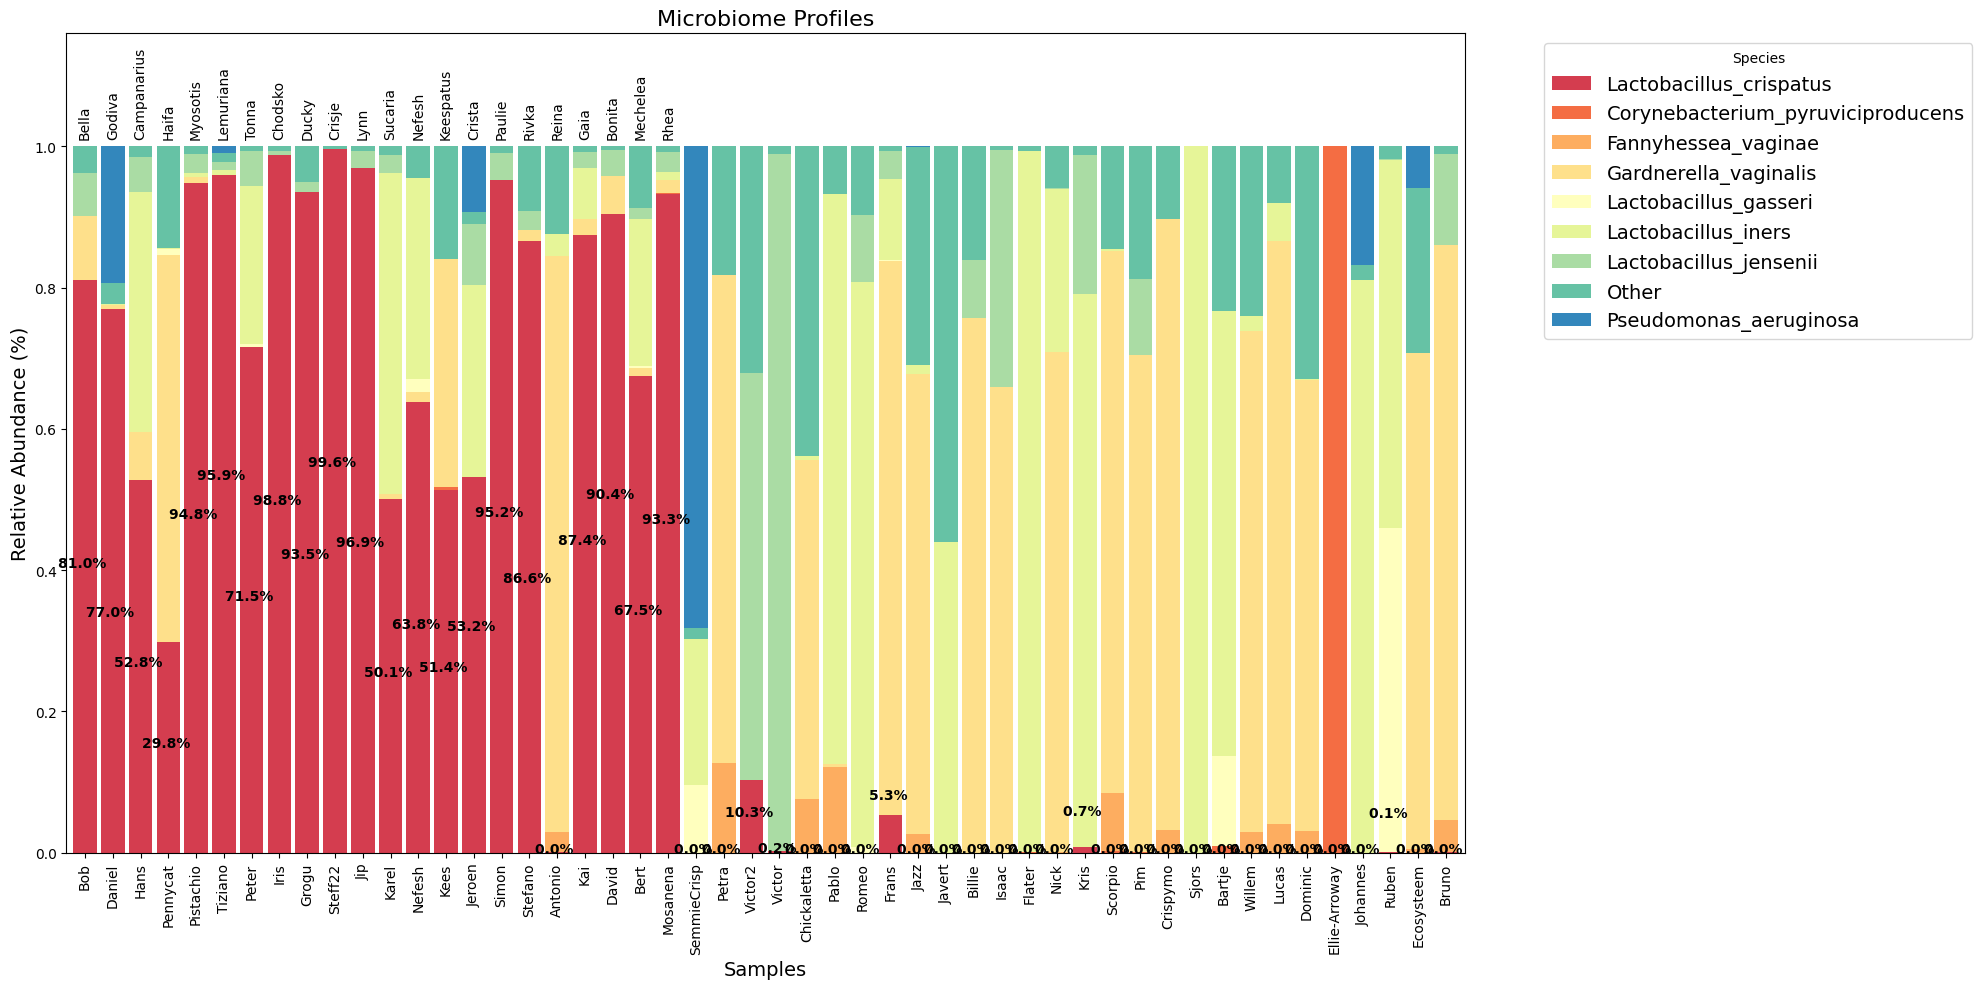

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random

# Load the Excel file
file_path = "/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/data/metagenome/bacteria_abundance_normalized.xlsx"
sample_name_table = pd.read_csv("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/data/metagenome/metagenome_sample_names.tsv", sep="\t")
sample_name_table.set_index("metagenome_name", inplace=True)
# Load the data, replacing ',' with '.' in abundance values for proper numeric handling
data = pd.read_excel(file_path, converters={col: lambda x: str(x).replace(",", ".") for col in pd.read_excel(file_path).columns[1:]})

# Remove the 's__' prefix from species names in 'ln_species'
data["ln_species"] = data["ln_species"].str.replace("^s__", "", regex=True)

# Extract sample names from the first row (excluding 'ln_species') and extract species names and their abundances
sample_names = data.columns[1:]
species = data["ln_species"]
abundance_data = data.iloc[:, 1:].astype(float)  # Convert the abundance values to float
abundance_data.index = species  # Set species as the index

# Compute the average relative abundance for each species across all samples, identify top species by abundance and add "Other" category
average_abundance = abundance_data.mean(axis=1)
top_species = average_abundance.nlargest(10).index.tolist()
other_abundance = abundance_data.loc[~abundance_data.index.isin(top_species)].sum()
filtered_data = abundance_data.loc[top_species]
filtered_data.loc["Other"] = other_abundance

# Ensure no duplicate species, somehow everything gets duplicated?
filtered_data = filtered_data.groupby(level=0).sum()
filtered_data = filtered_data.div(filtered_data.sum(axis=0), axis=1)
filtered_data = filtered_data.T  # Samples as rows, species as columns
# Ensure Lactobacillus crispatus is at the bottom of the stacked bar chart
filtered_data = filtered_data[["Lactobacillus_crispatus"] + [col for col in filtered_data.columns if col != "Lactobacillus_crispatus"]]

# Plot stacked bar chart with L. crispatus at the bottom
fig, ax = plt.subplots(figsize=(20, 10))
colors = sns.color_palette("Spectral", n_colors=len(filtered_data.columns))
filtered_data.plot(kind="bar", stacked=True, color=colors, width=0.85, ax=ax)

# Annotate percentages of L. crispatus in each bar and make sure they do not overlap (in height) by adding a value depending on the previous y-value
last_n = 0
crispatus_dict = {}
for idx, sample in enumerate(filtered_data.index):
    crispatus_value = filtered_data.loc[sample, "Lactobacillus_crispatus"] * 100
    crispatus_name = sample_name_table.loc[sample].values[0]
    if crispatus_name == "Not applicable": crispatus_name = ""
    ax.text(idx, 1.01, f"{crispatus_name}", fontsize=10, ha="center", va="bottom", rotation=90)

    if crispatus_value < 0.05:
        prevent_overlap = 0
    elif crispatus_value < last_n and crispatus_value > last_n - 10:
        prevent_overlap = -0.05
    elif crispatus_value > last_n and crispatus_value < last_n + 10:
        prevent_overlap = 0.05
    else:
        prevent_overlap = 0
    last_n = crispatus_value
    ax.text(idx, 
            filtered_data.loc[sample].cumsum()["Lactobacillus_crispatus"] - crispatus_value / 2 / 100 + prevent_overlap, 
            f"{crispatus_value:.1f}% ", fontsize=10, fontweight="bold", ha="center")
    crispatus_dict[sample] = (filtered_data.loc[sample].cumsum()["Lactobacillus_crispatus"] - crispatus_value / 2 / 100) * 2

# Customize the plot
plt.xlabel("Samples", fontsize=14)
plt.ylabel("Relative Abundance (%)", fontsize=14)
plt.title("Microbiome Profiles", fontsize=16)
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)
plt.xticks(ticks=range(len(sample_names)), labels=sample_names, fontsize=10)
plt.ylim(0, 1.16)
plt.tight_layout()

# Save and show the plot
output_plot = "/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/data/metagenome/microbiome_profile_plot.png"
plt.savefig(output_plot)
plt.show()

# print(f"Microbiome profile plot saved to {output_plot}")


# Adhesin genes search

In [3]:
# from rapidfuzz import process, fuzz
# from joblib import Parallel, delayed


# def fuzzy_match(row, right_data, right_column, threshold=80):
#     # Get the best match from the right dataset
#     match_result = process.extractOne(row, right_data[right_column].values, scorer=fuzz.partial_ratio)
    
#     if match_result is None:  # Handle cases where no match is found
#         return "None"
    
#     best_match, score, _ = match_result  # Unpack only the relevant values (best_match, score, and index)
    
#     if score >= threshold:  # Only accept matches above the threshold
#         return best_match
#     else:
#         return "None"


# # Parallelize the fuzzy matching process
# def parallel_fuzzy_merge(left_data, right_data, left_on, right_on, threshold=99, n_jobs=-1):
#     # Apply fuzzy matching in parallel across multiple CPU cores
#     results = Parallel(n_jobs=n_jobs)(
#         delayed(fuzzy_match)(row, right_data, right_on, threshold) for row in left_data[left_on]
#     )
#     return results


# pan_df = pd.read_csv("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/pangenome_results/stringent/PIRATE.gene_families.ordered.tsv", sep="\t")
# pfam_df = pd.read_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/adhesion/adhesion_search_table.xlsx")

# # hits_df = pan_df.loc[pan_df["consensus_product"].isin(pfam_df["Description"].tolist())]
# hits_df = parallel_fuzzy_merge(pan_df, pfam_df, left_on='consensus_product', right_on='Description', threshold=99)

In [4]:
# print(hits_df.count("None"))
# print(len(hits_df))
# # hits_df.to_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/adhesion/temp_results.xlsx")

In [5]:
# print(hits_df)

# Functional categories and microbiome profile correlation

ValueError: too many values to unpack (expected 2)

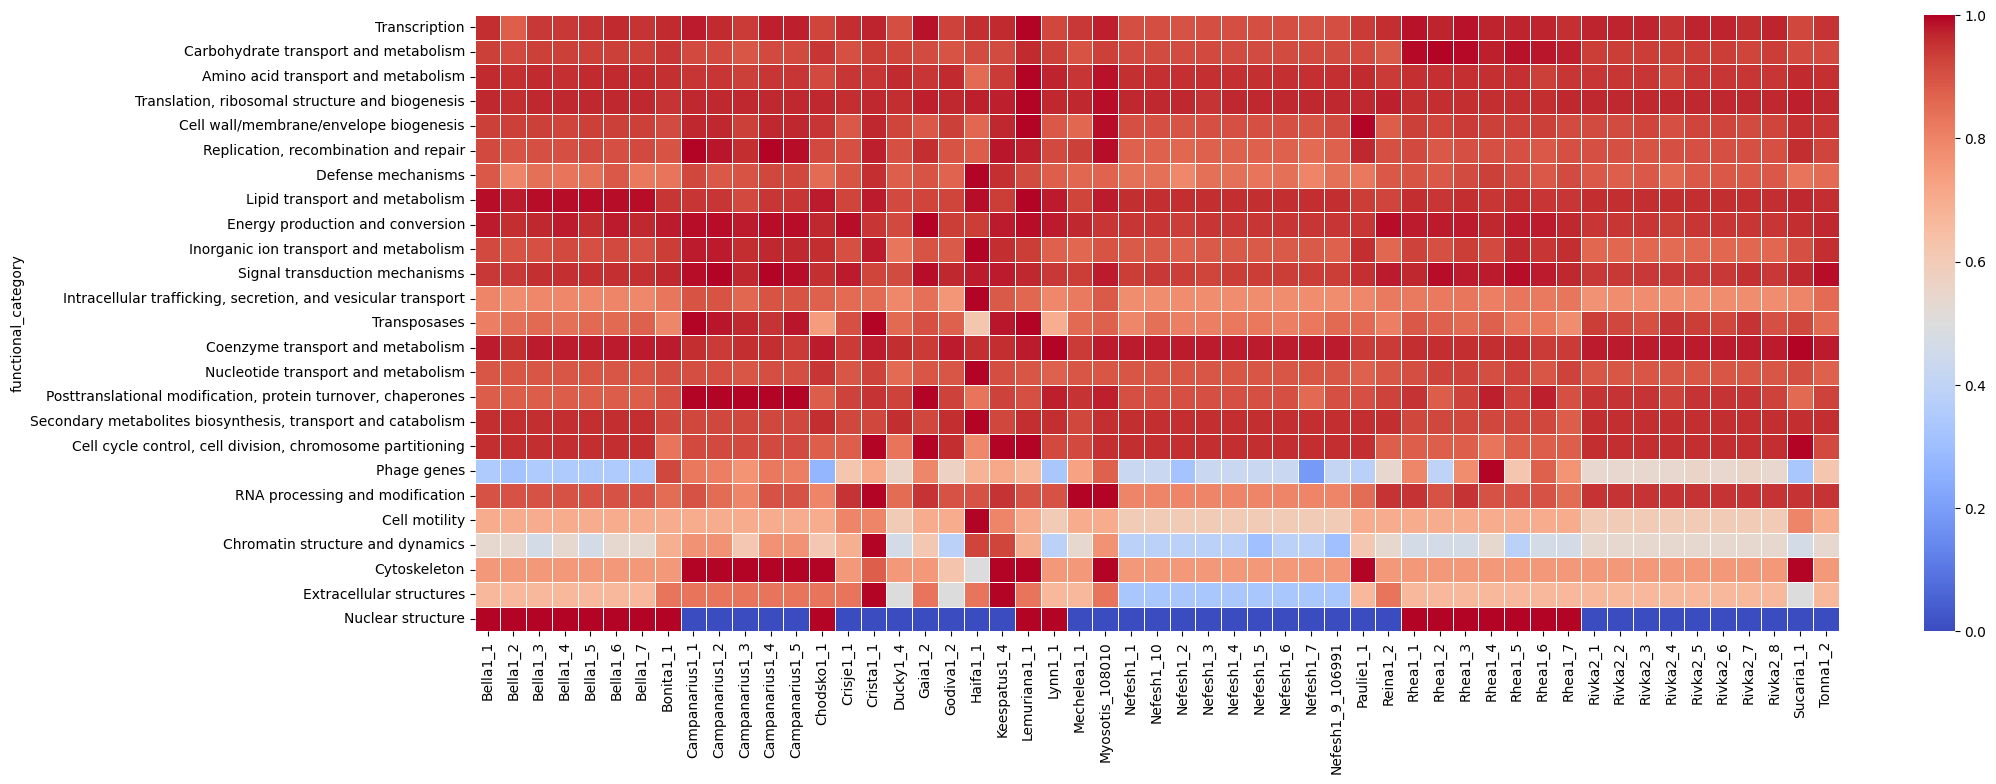

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

merged_gene_data = pd.read_excel("../results/pangenome_results/intra_individual/pandavis/COG_matched_gene_families_func_only.xlsx")
sample_columns = merged_gene_data.columns[merged_gene_data.columns.get_loc('Bella1_1'):merged_gene_data.columns.get_loc('Tonna1_2') + 1]
functional_group_totals = merged_gene_data.groupby('functional_category')[sample_columns].count()


plt.figure(figsize=(22, 8))
df_prophage = functional_group_totals
df_prophage_sorted = df_prophage.sort_values(by=df_prophage.columns[0], ascending=False)
df_prophage_n = df_prophage_sorted.div(df_prophage_sorted.max(axis=1), axis=0) # normalize rows
sns.heatmap(df_prophage_n, cmap="coolwarm", annot=False, fmt=".0f", linewidths=.5)

for idx, func_group in df_prophage_sorted.index:
    ax.text(23, idx, df_prophage_sorted[idx])

plt.title("Functional group counts", fontsize=16)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Functional category", fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()

# Save and show the heatmap
# plt.savefig(f"../results/pangenome_results/intra_individual/figures/functional_group_mge_heatmap_all_n.png")

display(df_prophage_n)

In [7]:
# crispatus_names_dict = {(sample_name if sample_name != "Not applicable" else meta_name): crispatus_dict[meta_name] for meta_name, sample_name in zip(mapping_names["metagenome_name"], mapping_names["crispatus_name"]) if meta_name in crispatus_dict}
# print(crispatus_names_dict)
# print(crispatus_dict.keys())
print(functional_group_totals.index)

Index(['Amino acid transport and metabolism',
       'Carbohydrate transport and metabolism',
       'Cell cycle control, cell division, chromosome partitioning',
       'Cell motility', 'Cell wall/membrane/envelope biogenesis',
       'Chromatin structure and dynamics', 'Coenzyme transport and metabolism',
       'Cytoskeleton', 'Defense mechanisms',
       'Energy production and conversion', 'Extracellular structures',
       'Inorganic ion transport and metabolism',
       'Intracellular trafficking, secretion, and vesicular transport',
       'Lipid transport and metabolism', 'Nuclear structure',
       'Nucleotide transport and metabolism', 'Phage genes',
       'Posttranslational modification, protein turnover, chaperones',
       'RNA processing and modification',
       'Replication, recombination and repair',
       'Secondary metabolites biosynthesis, transport and catabolism',
       'Signal transduction mechanisms', 'Transcription',
       'Translation, ribosomal structure 

In [27]:
from scipy.stats import spearmanr

# Convert metagenome names to crispatus names (if they have one, else just keep the metagenome name)
mapping_names = pd.read_csv("../data/metagenome/metagenome_sample_names.tsv", sep="\t")
crispatus_names_dict = {(sample_name if sample_name != "Not applicable" else meta_name): crispatus_dict[meta_name] for meta_name, sample_name in zip(mapping_names["metagenome_name"], mapping_names["crispatus_name"]) if meta_name in crispatus_dict}

# Add crispatus abundances to correct sample names (_1, _2, etc)
crispatus_abundance = pd.DataFrame() 
for name in sample_df_n.columns:
    for k, v in crispatus_names_dict.items():
        if k in name:
            crispatus_abundance.loc[name, "crispatus_abundance"] = v
            break

# Extract sample prefixes to group related samplesand calculate the mean for functional groups and crispatus abundance
crispatus_abundance["group"] = crispatus_abundance["group"] = crispatus_abundance.index.str.split("_").str[0]
functional_group_totals = sample_df_n.T
functional_group_totals["group"] = functional_group_totals.index.str.split("_").str[0]
# display(functional_group_totals)
grouped_abundance = crispatus_abundance.groupby("group")["crispatus_abundance"].mean()
grouped_functional_groups = (
    functional_group_totals
    .groupby("group", axis=0)  # Group by "group" along the row axis
    .mean(numeric_only=True)  # Use numeric_only=True to ignore non-numeric columns like "group"
)
# grouped_functional_groups.reset_index(inplace=True)

# Calculate Spearman correlation for each functional category
correlations = []
p_values = []

for category in grouped_functional_groups.columns:
    if category == 'group':
        continue
    corr, p_val = spearmanr(grouped_abundance, grouped_functional_groups.loc[:, category])
    correlations.append(corr)
    p_values.append(p_val)

# Compile results into a DataFrame
results = pd.DataFrame({
    "Functional_category": grouped_functional_groups.columns,
    "Spearman_correlation": correlations,
    "P_value": p_values
})
display(results)
# Save results to CSV
# results_file = "/path/to/spearman_results.csv"  # Replace with your desired output path
# results.to_csv(results_file, index=False)

/tmp/ipykernel_1061/3167461644.py:23: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  .groupby("group", axis=0)  # Group by "group" along the row axis


,Functional_category,Spearman_correlation,P_value
0,Transcription,0.014706,0.948211
1,Carbohydrate transport and metabolism,0.487683,0.021315
2,Amino acid transport and metabolism,0.440350,0.040265
3,"Translation, ribosomal structure and biogenesis",-0.296050,0.180974
4,Cell wall/membrane/envelope biogenesis,0.144879,0.520041
5,"Replication, recombination and repair",0.034522,0.878781
6,Defense mechanisms,-0.187783,0.402677
7,Lipid transport and metabolism,0.053039,0.814659
8,Energy production and conversion,0.145817,0.517311
9,Inorganic ion transport and metabolism,-0.139457,0.535939


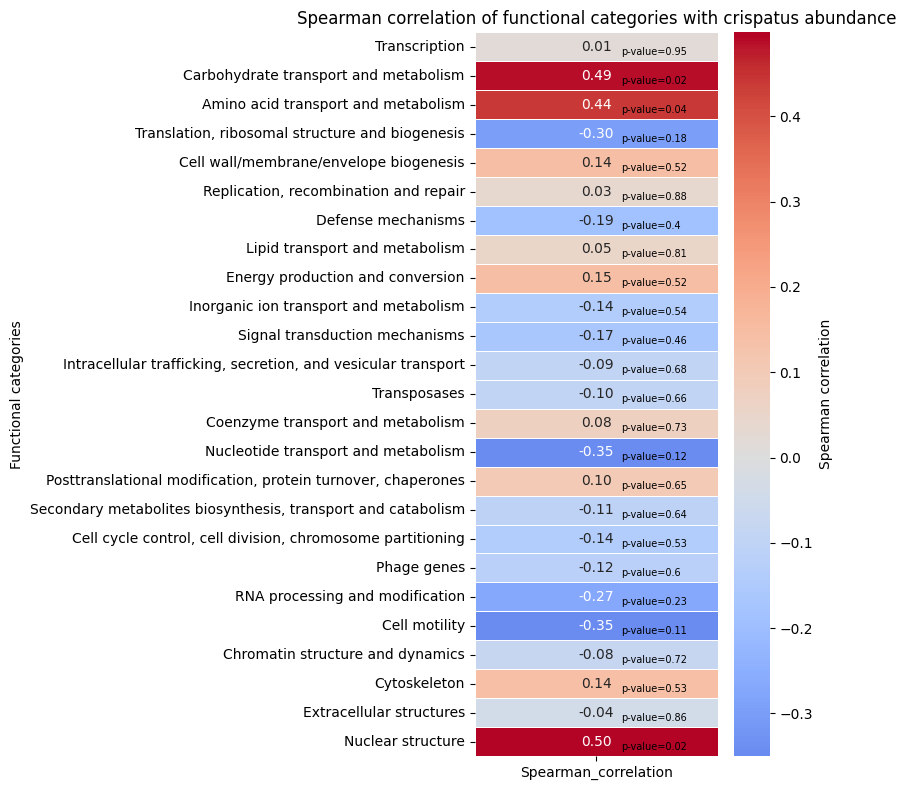

In [28]:
heatmap_data = results.set_index("Functional_category")[["Spearman_correlation"]]

# Create a heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman correlation"},
    fmt=".2f",
)

for idx, p_value in enumerate(results.P_value):
    ax.text(0.6, idx+0.5, f"p-value={round(p_value, 2)}", fontsize=7, va="top")

plt.title("Spearman correlation of functional categories with crispatus abundance")
plt.xlabel("")
plt.ylabel("Functional categories")
plt.tight_layout()
plt.savefig("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/data/metagenome/corr_abundance_func_groups.png")
plt.show()

# Bacteriocins

In [29]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_bacteriocins = pd.read_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/bacteriocin/bacteriocin_table.xlsx")
df_bacteriocins[["Sample", "Class"]].groupby(["Sample"]).agg(['count', 'nunique'])

Class        
                 count nunique
Sample                        
Bella1_1             8       5
Bella1_2             6       4
Bella1_3             8       5
Bella1_4             6       3
Bella1_5             7       4
Bella1_6             8       5
Bella1_7             7       4
Bonita1_1            5       5
Campanarius1_1       5       4
Campanarius1_2       5       4
Campanarius1_3       5       4
Campanarius1_4       5       4
Campanarius1_5       5       4
Chodsko1_1           5       4
Crisje1_1            5       4
Crista1_1            7       5
Ducky1_4             6       5
Gaia1_2              5       4
Godiva1_2            8       5
Haifa1_1            11       7
Keespatus1_4         6       5
Lemuriana1_1         8       5
Lynn1_1              7       5
Mechelea1_1          6       4
Myosotis_108010      7       5
Nefesh1-9_106991     8       6
Nefesh1_1            8       6
Nefesh1_10           8       6
Nefesh1_2            7       5
Nefesh1_3            8       6
Nefesh1_4            8       6
Nefesh1_5            8       6
Nefesh1_6            8       6
Nefesh1_7            8       6
Paulie1_1            9       6
Reina1_2             6       4
Rhea1_1              5       5
Rhea1_2              6       5
Rhea1_3              5       5
Rhea1_4              6       5
Rhea1_5              5       5
Rhea1_6              5       4
Rhea1_7              3       3
Rivka2_1             9       6
Rivka2_2             9       6
Rivka2_3             9       6
Rivka2_4             9       6
Rivka2_5             9       5
Rivka2_6             9       6
Rivka2_7             9       6
Rivka2_8             9       6
Sucaria1_1           8       6
Tonna1_1             5       4

In [31]:
df_bacteriocins["Class"].unique()

array(['Penocin_A', 'Enterolysin_A', 'Bacteriocin_helveticin_J',
       'Helveticin-J', 'SakT_alpha', 'Helveticin',
       'Lanthipeptide_class_I', 'LAPs', 'putative_bacteriocin',
       'CoagulinA', 'Amylovorin'], dtype=object)

In [32]:
df_bacteriocins[["Sample", "I", "IIa", "IIb", "III", "Unknown"]].groupby(["Sample"]).agg("sum")

,I,IIa,IIb,III,Unknown
Sample,,,,,
Bella1_1,0,1,1,5,0
Bella1_2,0,1,0,4,0
Bella1_3,0,1,1,5,0
Bella1_4,0,0,0,5,0
Bella1_5,0,1,0,5,0
Bella1_6,0,1,1,5,0
Bella1_7,0,1,0,5,0
Bonita1_1,1,0,1,2,0
Campanarius1_1,0,1,0,3,0


# CRISPR-Cas

In [22]:
import pandas as pd
import numpy as np
df_crispr = pd.read_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/crisprcas/HMM2019_cassettes_freek.xlsx")
df_crispr["sample_name"] = df_crispr["sample"].str.extract(r'^([^_]+_[^_]+)')
# df_crispr

## Subtypes

In [23]:
df_pred = pd.read_csv("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/crisprcas/predictions.csv", index_col="cassette_id")
# df_pred

In [24]:
df_crispr_merged = df_crispr.set_index("cassette_id").join(df_pred)
# display(df_crispr_merged)
crispr_predictions = np.sort(df_crispr_merged["predicted_label"].unique())

for prediction in crispr_predictions:
    df_crispr_merged[prediction] = df_crispr_merged['sample_name'].apply(
        lambda x: 1 if prediction in df_crispr_merged[df_crispr_merged['sample_name'] == x]['predicted_label'].values else 0
    )
# display(df_crispr_merged)

In [26]:
# display(df_crispr_merged.reset_index())
crispr_pred_result = df_crispr_merged.reset_index().drop_duplicates(subset=["cassette_id", "predicted_label", "sample_name"])
crispr_pred_result = df_crispr_merged.reset_index().drop_duplicates("sample_name")
crispr_pred_result.shape
# crispr_pred_result.to_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/crisprcas/crisprcas_results_subtypes.xlsx")

## Continue original from here (CRISPR-Cas components only, but not subtypes)

In [34]:
crispr_components = df_crispr["annotation"].unique()
for component in crispr_components:
    df_crispr[component] = df_crispr['sample_name'].apply(
        lambda x: 1 if component in df_crispr[df_crispr['sample_name'] == x]['annotation'].values else 0
    )

# Display the result
crispr_result = df_crispr.drop_duplicates("sample_name")
# display(df_crispr.drop_duplicates("sample_name"))
# crispr_result.to_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/crisprcas/crisprcas_results.xlsx")
# display(crispr_result)

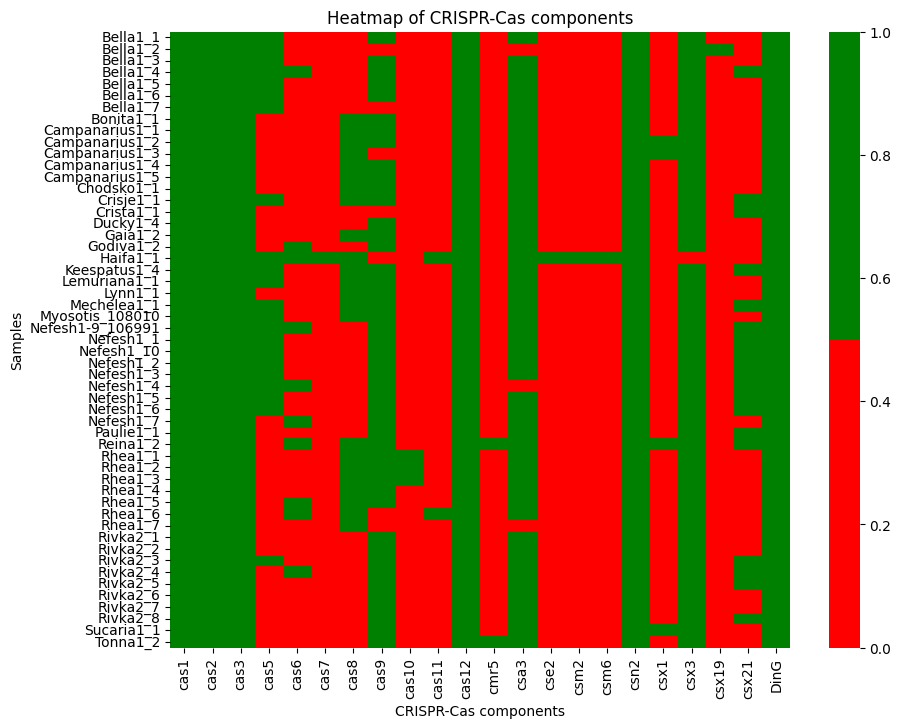

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

crispr_order = ['cas1', 'cas2', 'cas3', 'cas5', 'cas6', 'cas7', 'cas8', 'cas9', 'cas10', 'cas11', 'cas12', 'cmr5', 'csa3', 'cse2', 
 'csm2', 'csm6', 'csn2', 'csx1', 'csx3', 'csx19', 'csx21', 'DinG']

# crispr_heatmap = crispr_result.loc[:, crispr_order].sort_index(axis=1)

crispr_heatmap2 = crispr_result.reindex(crispr_order, axis=1)
crispr_heatmap2.to_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/crisprcas/crisprcas_heatmap.xlsx")
cmap = matplotlib.colors.ListedColormap(['red', 'green'])
plt.figure(figsize=(10, 8))
sns.heatmap(crispr_heatmap2, cmap=cmap, cbar=True, fmt='d', xticklabels=crispr_order, yticklabels=crispr_result['sample_name'])
plt.title("Heatmap of CRISPR-Cas components")
plt.xlabel("CRISPR-Cas components")
plt.ylabel("Samples")
plt.show()

In [36]:
crispr_sum = crispr_result[crispr_order].sum(axis=1)

corr, p_val = spearmanr(crispr_sum, functional_group_totals.loc[:, "Phage genes"])
print(corr, p_val)

0.05991233239918321 0.6699978219750395


In [40]:
# print(crispr_result[crispr_order])
# print(crispr_sum)

# Summary statistics

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_overview_full = pd.read_excel('/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_table.xlsx', skiprows=[0])
uniques = df_overview_full.apply(lambda x: x.nunique())
df_overview = df_overview_full.drop(uniques[uniques==1].index, axis=1).drop("Glycogen growth prediction indication", axis=1)

# Define the dependent variable (target) and independent variables (features)
target = 'Abundance'
features = df_overview.columns.difference(['Sample name', target])
print(len(features))
# features = features.drop(['csm2', 'csm6', 'GT2', 'GTA', 'GTB'])
print(len(features))

31
31


In [10]:
from scipy.stats import spearmanr

# Calculate Spearman correlation between each feature and the target
correlations = {}
for feature in features:
    corr, p_value = spearmanr(df_overview[feature], df_overview[target])
    correlations[feature] = {'Spearman Rho': corr, 'p-value': p_value}  # p_value*len(features)

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
correlation_df = correlation_df.sort_values(by='Spearman Rho', ascending=False)
print(correlation_df)


                                 Spearman Rho   p-value
cas10                                0.274081  0.047037
csx3                                 0.228188  0.100304
IIb                                  0.221386  0.111132
cas8                                 0.212985  0.125719
cas9                                 0.128379  0.359601
IIa                                 -0.008913  0.949497
csx19                               -0.009128  0.948281
csa3                                -0.021497  0.878570
cas11                               -0.052137  0.710814
GTA                                 -0.070160  0.617634
nunique                             -0.087303  0.534201
GTB                                 -0.102290  0.466100
GT1                                 -0.102290  0.466100
GT2                                 -0.102290  0.466100
bacteriocins count                  -0.102959  0.463172
I                                   -0.128493  0.359171
CRISPR-Cas count                    -0.168912  0

csx1 matig negatieve correlatie (~-0.4), maar 4 positief, waarvan 2 Campanarius

In [11]:
merged_gene_data = pd.read_excel("../results/pangenome_results/intra_individual/pandavis/COG_matched_gene_families_func_only.xlsx")
sample_columns = merged_gene_data.columns[merged_gene_data.columns.get_loc('Bella1_1'):merged_gene_data.columns.get_loc('Tonna1_2') + 1]
functional_group_totals = merged_gene_data.groupby('functional_category')[sample_columns].count().T  #.drop(
#     ["Bella1_2", 'Bella1_3', 'Bella1_4', 'Bella1_5', 'Bella1_6', 'Bella1_7', 'Nefesh1_2', 'Nefesh1_3', 'Nefesh1_4', 'Nefesh1_5', 
#      'Nefesh1_6', 'Nefesh1_7', 'Nefesh1_9_106991', 'Nefesh1_10', 'Campanarius1_2', 'Campanarius1_3', 'Campanarius1_4', 'Campanarius1_5',
#      'Rhea1_2', 'Rhea1_3', 'Rhea1_4', 'Rhea1_5', 'Rhea1_6', 'Rhea1_7', 'Rivka2_2', 'Rivka2_3', 'Rivka2_4', 'Rivka2_5', 'Rivka2_6', 'Rivka2_7', 'Rivka2_8'])
# df_overview.set_index("Sample name", inplace=True)
# df_overview = df_overview.drop(["Bella1_2", 'Bella1_3', 'Bella1_4', 'Bella1_5', 'Bella1_6', 'Bella1_7', 'Nefesh1_2', 'Nefesh1_3', 'Nefesh1_4', 'Nefesh1_5', 
#      'Nefesh1_6', 'Nefesh1_7', 'Nefesh1-9_106991', 'Nefesh1_10', 'Campanarius1_2', 'Campanarius1_3', 'Campanarius1_4', 'Campanarius1_5',
#      'Rhea1_2', 'Rhea1_3', 'Rhea1_4', 'Rhea1_5', 'Rhea1_6', 'Rhea1_7', 'Rivka2_2', 'Rivka2_3', 'Rivka2_4', 'Rivka2_5', 'Rivka2_6', 'Rivka2_7', 'Rivka2_8'])

correlations = {}
for feature in features:
    corr, p_value = spearmanr(df_overview[feature], functional_group_totals["Phage genes"])
    correlations[feature] = {'Spearman Rho': corr, 'p-value': p_value}  # p_value*len(features)

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
correlation_df = correlation_df.sort_values(by='Spearman Rho', ascending=False)
print(correlation_df)

                                 Spearman Rho       p-value
cas8                                 0.638931  2.625587e-07
Glycogen growth prediction           0.288534  3.614788e-02
cas11                                0.217462  1.177750e-01
cas10                                0.109735  4.340952e-01
csa3                                 0.093677  5.046548e-01
Unknown                              0.090915  5.173511e-01
cse2                                 0.090915  5.173511e-01
cas7                                 0.090915  5.173511e-01
csm6                                 0.090915  5.173511e-01
csm2                                 0.090915  5.173511e-01
CRISPR-Cas count                     0.059912  6.699978e-01
csx1                                 0.049170  7.266098e-01
cmr5                                 0.032457  8.175346e-01
cas6                                -0.015808  9.105490e-01
MucBP domain-containing protein     -0.065560  6.409255e-01
csx3                                -0.0

GT fragmenten lijken significant, wanneer intra invidu samples gegroepeerd zijn alleen GTA significant (0.041710 < 0.05), andere GT fragmenten = 0.058126. Redelijk sterke negatieve correlation (~-0.67)

cas8 Redelijk sterke positieve correlatie (~0.64)

cas5 Matige negatieve correlatie (~-0.39)

     Spearman Rho       p-value
GTA     -0.663890  5.998406e-08
GT1     -0.668477  4.503764e-08
GT2     -0.668477  4.503764e-08
GTB     -0.668477  4.503764e-08


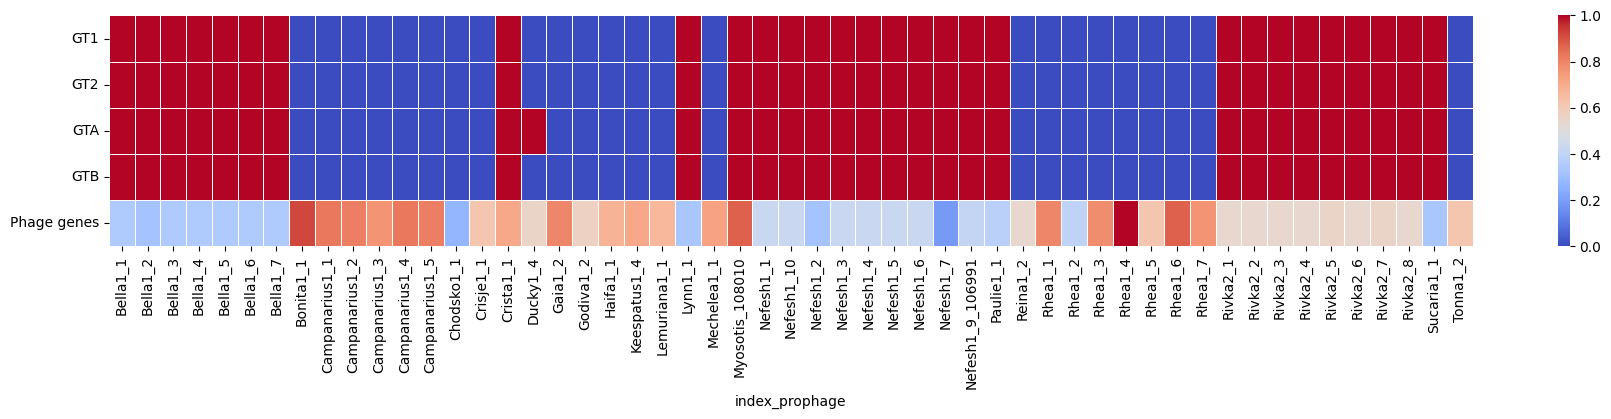

In [45]:
df1 = df_overview[['GT1', 'GT2', 'GTA', 'GTB']].reset_index()
df2 = functional_group_totals['Phage genes'].reset_index()
# display(df1)
# display(df2)

df_prophage = df1.join(df2, lsuffix='_gt', rsuffix='_prophage').drop('index_gt', axis=1).set_index('index_prophage').T
df_prophage_norm = df_prophage.div(df_prophage.max(axis=1), axis=0)
# display(df_prophage)

plt.figure(figsize=(22, 3))
sns.heatmap(df_prophage_norm, cmap="coolwarm", annot=False, fmt=".0f", linewidths=.5)

# Spearman correlation between all GT fragments and Phage genes
df_prophage_T = df_prophage.T
phage_features = ['GT1', 'GT2', 'GTA', 'GTB']
correlations = {}
for feature in phage_features:
    corr, p_value = spearmanr(df_prophage_T[feature], df_prophage_T["Phage genes"])
    correlations[feature] = {'Spearman Rho': corr, 'p-value': p_value}  # p_value*len(features)

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
correlation_df = correlation_df.sort_values(by='Spearman Rho', ascending=False)
print(correlation_df)

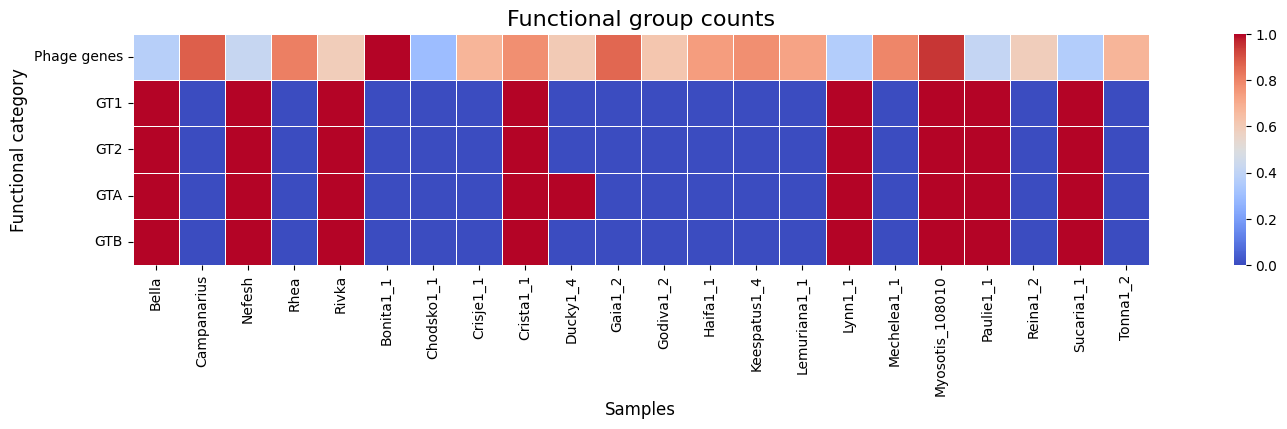

     Spearman Rho   p-value
GT1     -0.409929  0.058126
GT2     -0.409929  0.058126
GTB     -0.409929  0.058126
GTA     -0.437536  0.041710


In [46]:
"""
Group the intra individual samples before doing a Spearman rank correlation test to avoid inflating the numbers. 
Majority vote for GT fragments and mean of Phage genes
"""

from scipy.stats import spearmanr

intra_individuals = ["Bella", "Campanarius", "Nefesh", "Rhea", "Rivka"]
grouped_results = {}

# Process intra-individuals by calculating majority and mean
for prefix in intra_individuals:
    # Filter columns that match the prefix
    group_df = df_prophage.filter(regex=f"^{prefix}")
    
    # Calculate the majority value for GT1, GTA, and GTB
    majority_values = group_df.loc[["GT1", "GT2", "GTA", "GTB"]].mode(axis=1)[0]
    
    # Calculate the mean for Phage genes
    phage_mean = group_df.loc["Phage genes"].mean()
    
    # Combine results
    grouped_results[prefix] = pd.Series(
        data=list(majority_values) + [phage_mean],
        index=["GT1", "GT2", "GTA", "GTB", "Phage genes"]
    )

# Add columns for individuals not in intra-individuals without modification
for col in df_prophage.columns:
    if not any(col.startswith(prefix) for prefix in intra_individuals):
        grouped_results[col] = df_prophage[col]
# Convert the results to a DataFrame for better readability
grouped_summary_df = pd.DataFrame(grouped_results)

# display(grouped_summary_df.T)
plt.figure(figsize=(22, 3))
grouped_summary_df_sorted = grouped_summary_df.sort_values(by=grouped_summary_df.columns[0], ascending=False)
grouped_df_n = grouped_summary_df_sorted.div(grouped_summary_df_sorted.max(axis=1), axis=0) 
sns.heatmap(grouped_df_n, cmap="coolwarm", linewidths=.5, square=True)
plt.title("Functional group counts", fontsize=16)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Functional category", fontsize=12)
# plt.tight_layout()
plt.show()

# Spearman correlation between all GT fragments and Phage genes
df_prophage_T = grouped_summary_df.T
phage_features = ['GT1', 'GT2', 'GTA', 'GTB']
correlations = {}
for feature in phage_features:
    corr, p_value = spearmanr(df_prophage_T[feature], df_prophage_T["Phage genes"])
    correlations[feature] = {'Spearman Rho': corr, 'p-value': p_value}  # p_value*len(features)

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index')
correlation_df = correlation_df.sort_values(by='Spearman Rho', ascending=False)
print(correlation_df)

In [49]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import r2_score, mean_squared_error
# import matplotlib.pyplot as plt

# # Prepare the data
# X = df_overview[features]
# y = df_overview[target]

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Set up the Random Forest with GridSearchCV for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Train the Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=0)
# rf.fit(X_train, y_train)


# # Perform grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best parameters found: ", grid_search.best_params_)

# # Evaluate on test set
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # # Evaluate the model
# # y_pred = rf.predict(X_test)

# print("R² Score:", r2_score(y_test, y_pred))
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# # Feature importance
# feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
# print("\nTop features impacting Abundance:\n", feature_importance)

# # plt.scatter(X_test['bacteriocins count'].values, y_test, color = 'red')
# # plt.scatter(X_test['bacteriocins count'].values, y_pred, color = 'green')
# # plt.title('Random Forest Regression')
# # plt.xlabel('CRISPR-Cas count')
# # plt.ylabel('Crispatus abundance')
# # plt.show()

In [76]:
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

# Prepare the data
X = sm.add_constant(X)  # Add constant for the intercept
model = QuantReg(y, X).fit(q=0.9)  # Median regression (50th percentile)

# Summary of the regression model
print(model.summary())


                         QuantReg Regression Results                          
Dep. Variable:              Abundance   Pseudo R-squared:               0.6405
Model:                       QuantReg   Bandwidth:                     0.03246
Method:                 Least Squares   Sparsity:                      0.05921
Date:                Mon, 13 Jan 2025   No. Observations:                   53
Time:                        14:13:16   Df Residuals:                       31
                                        Df Model:                           21
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2346      0.016     14.730      0.000       0.202       0.267
CRISPR-Cas count                    0.0615      0.010      6.041      0.000       0.041       0.082
GT1                                -0.0379     

/home/freekdek/miniforge3/envs/jupy_notebook/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


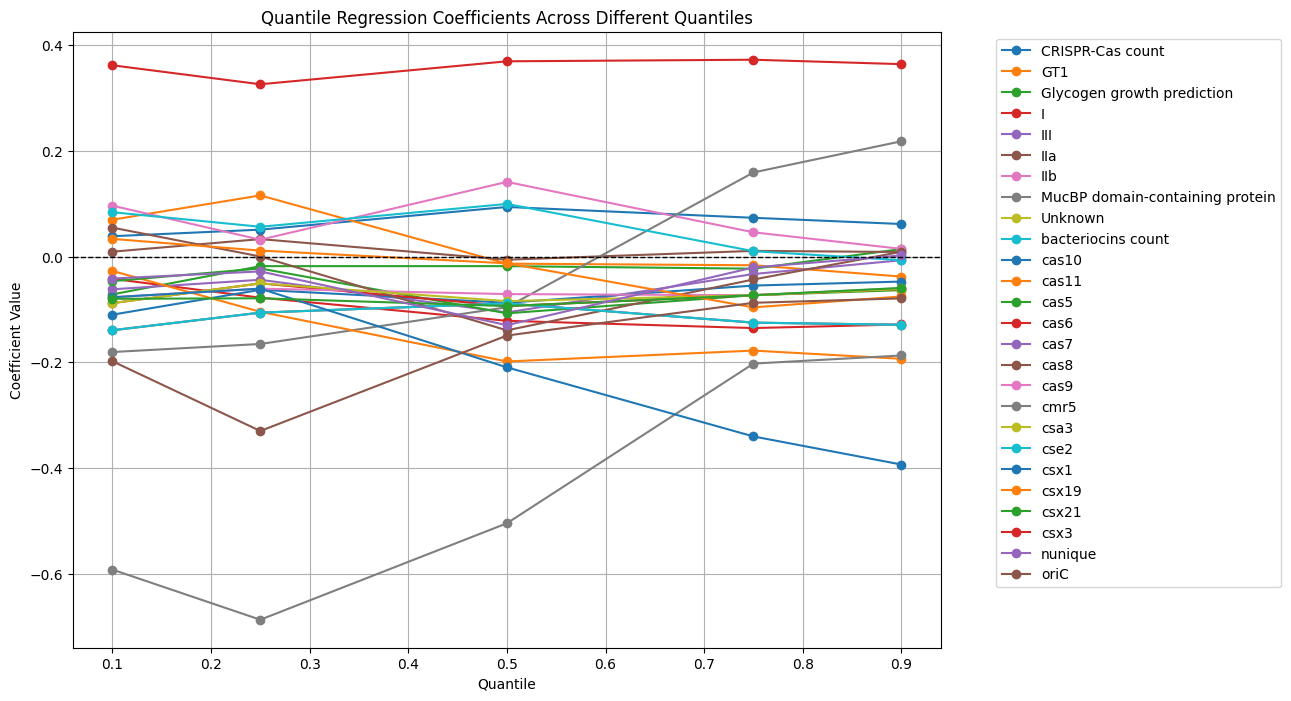

In [91]:
# Define the quantiles to fit
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Store results
results = {}

for q in quantiles:
    model = QuantReg(y, X).fit(q=q)
    results[q] = model.params

# Convert results to a DataFrame
coeffs = pd.DataFrame(results)
coeffs.index.name = 'Predictor'

# Plot the coefficients across quantiles
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
for predictor in features:
    ax.plot(coeffs.columns, coeffs.loc[predictor], marker='o', label=predictor)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Quantile')
plt.ylabel('Coefficient Value')
plt.title('Quantile Regression Coefficients Across Different Quantiles')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.show()


<Axes: >

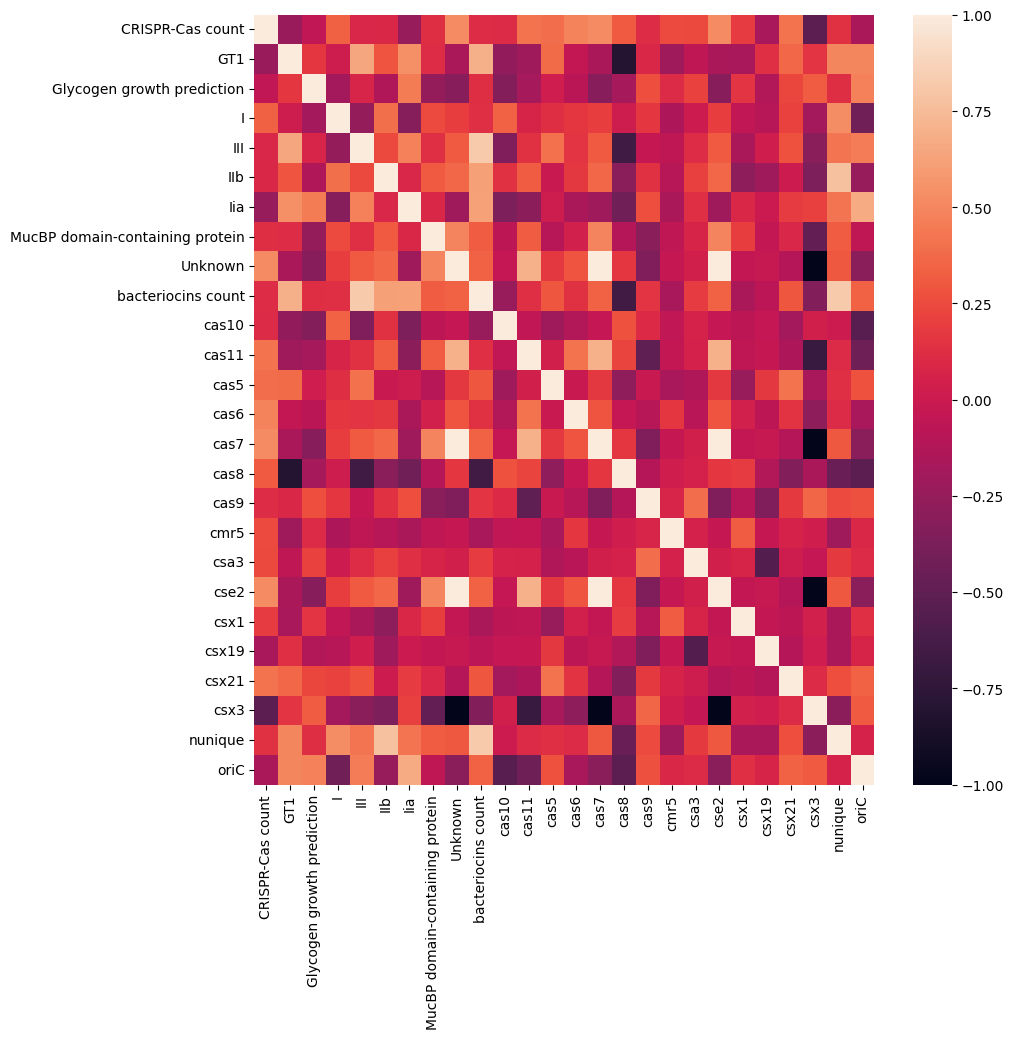

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr())

<Axes: >

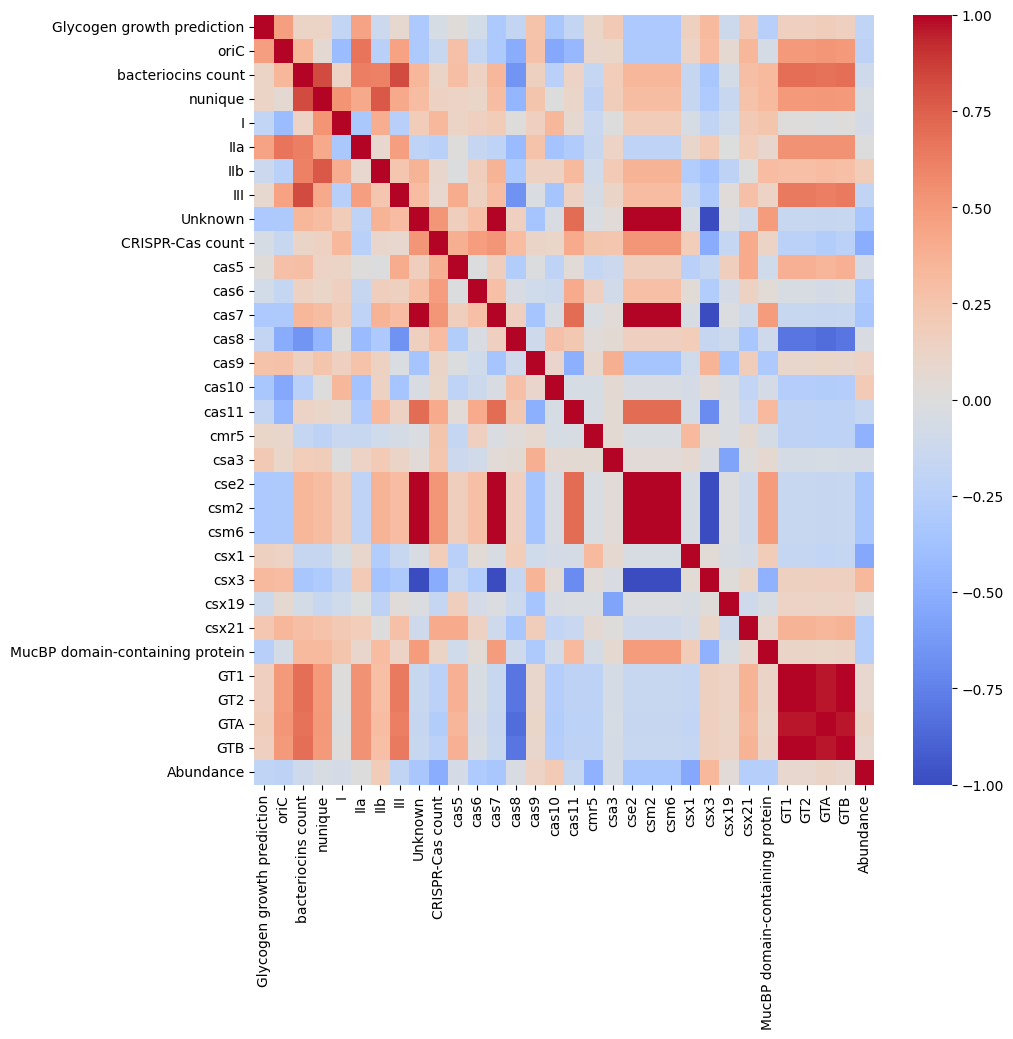

In [57]:
df_overview_full = pd.read_excel('/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_table.xlsx', skiprows=[0])
uniques = df_overview_full.apply(lambda x: x.nunique())
df_overview = df_overview_full.drop(uniques[uniques==1].index, axis=1).drop(["Glycogen growth prediction indication", "Sample name"], axis=1)

fig, ax = plt.subplots(figsize=(10,10))
# display(df_overview)
sns.heatmap(df_overview.corr(), cmap="coolwarm")

In [59]:
df_overview_dedup = df_overview_full.drop_duplicates()
df_overview_dedup.shape

(53, 50)

## Boxplots

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df_overview_full = pd.read_excel('/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_table.xlsx', skiprows=[0])
uniques = df_overview_full.apply(lambda x: x.nunique())
# df_overview_full = df_overview_full.drop(df_overview_full[(df_overview_full['Sample name'] == 'Haifa1_1')].index) # & (df_overview_full['Sample name'] =='Reina1_2')
df_overview = df_overview_full.drop(uniques[uniques==1].index, axis=1).drop(["Glycogen growth prediction indication", "Sample name", "Unknown", "cas7", 
                                                                             "cse2", "csm2", "csm6", "csx3"], axis=1)

features = df_overview.columns.difference(['Sample name', 'Abundance'])
# features = features.drop(['csm2', 'csm6', 'GT2', 'GTA', 'GTB'])
# display(df_overview)

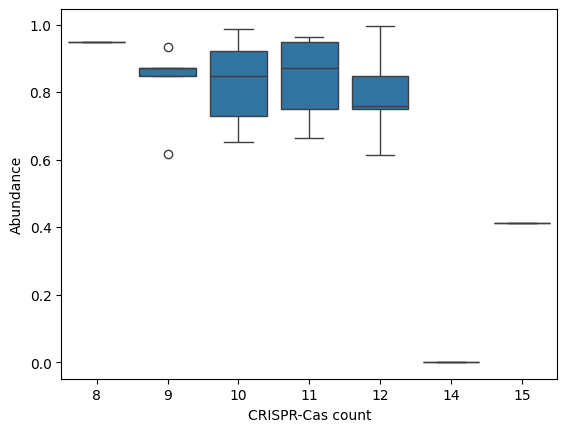

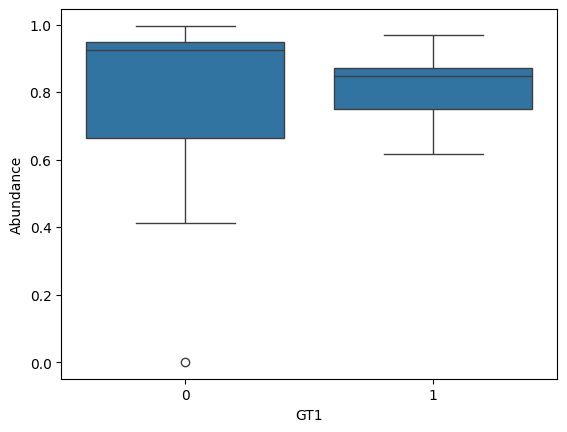

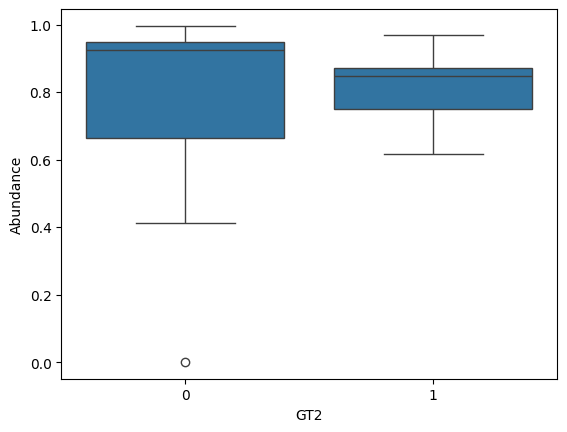

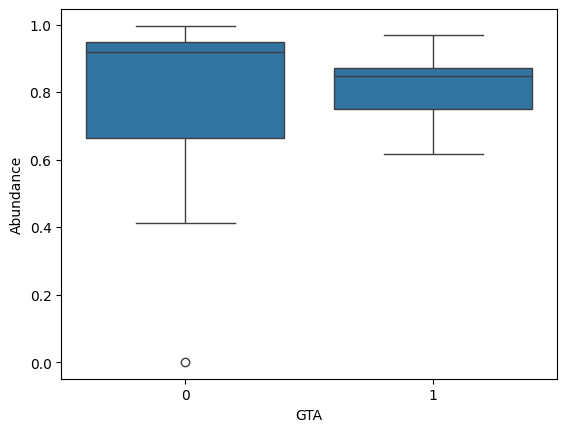

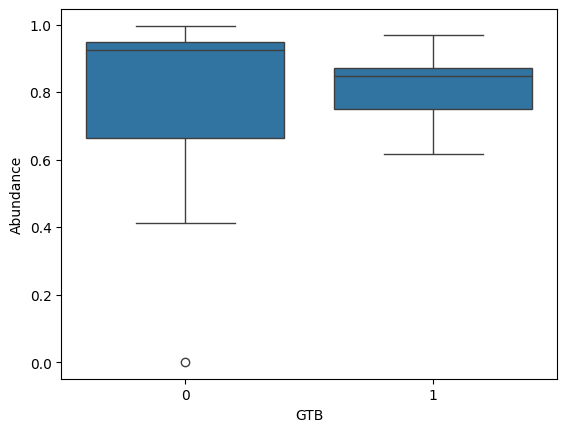

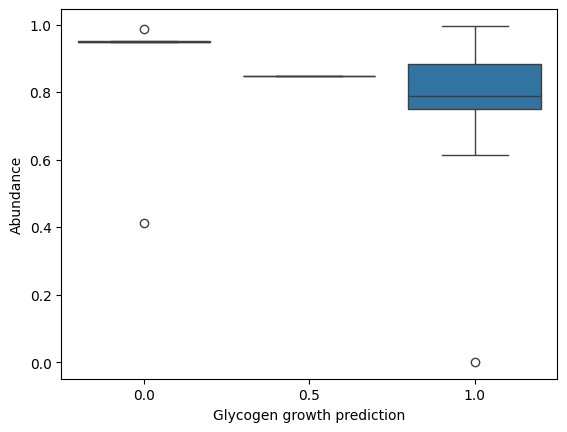

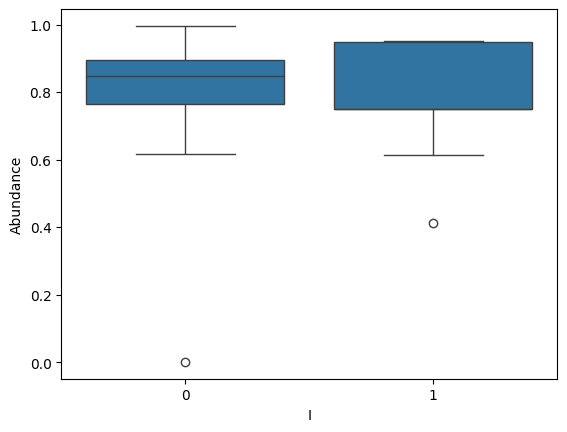

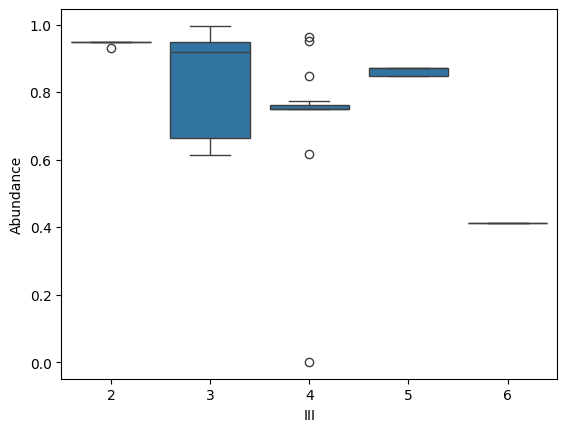

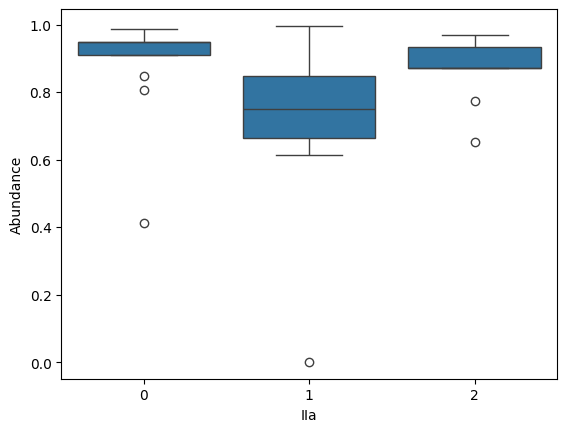

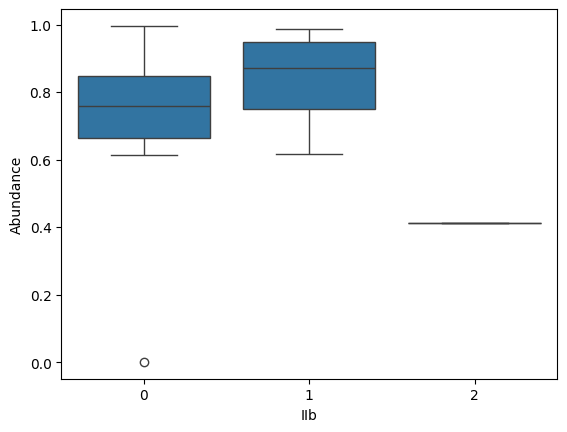

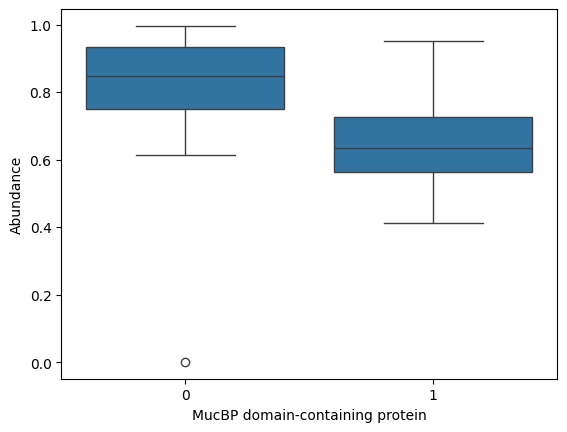

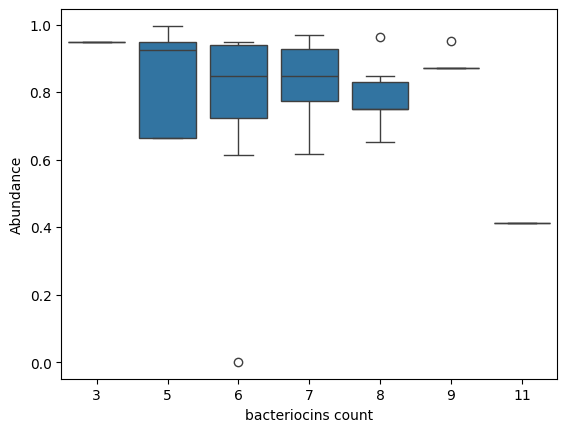

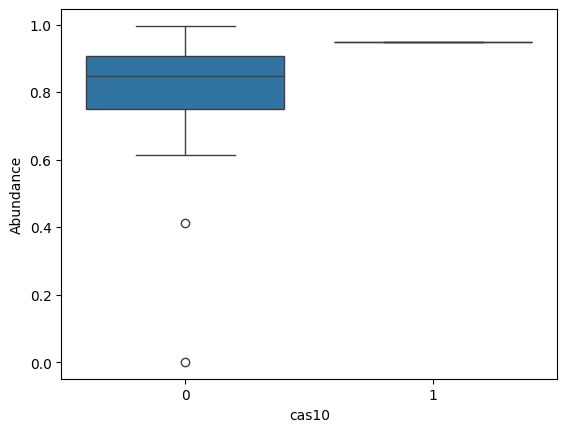

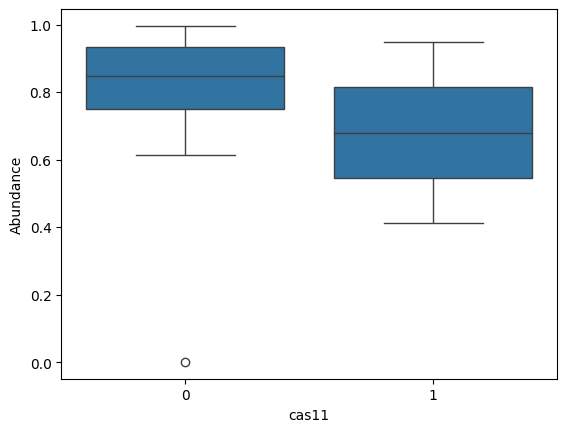

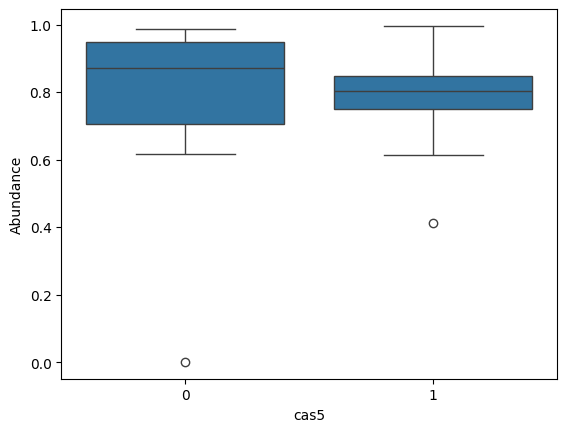

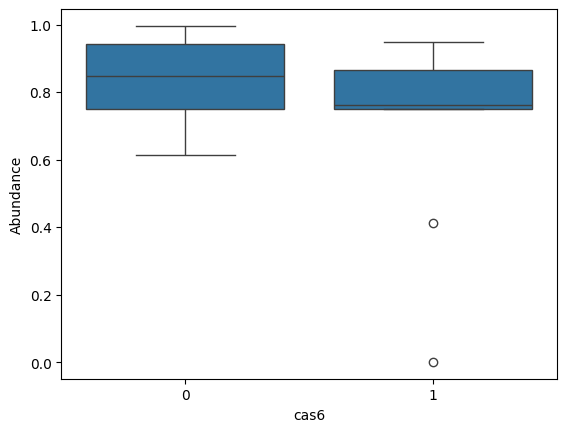

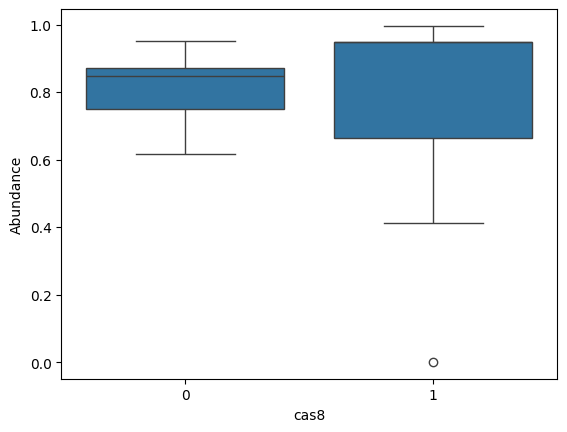

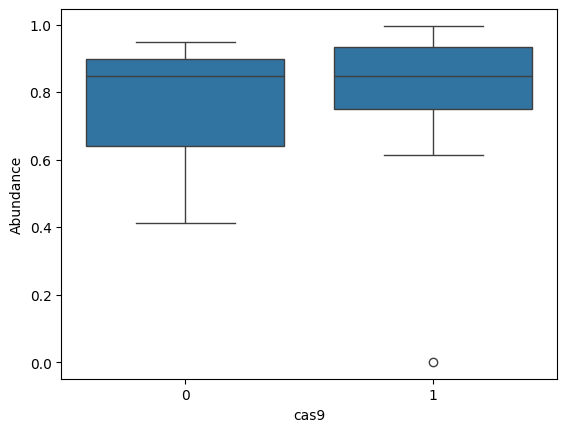

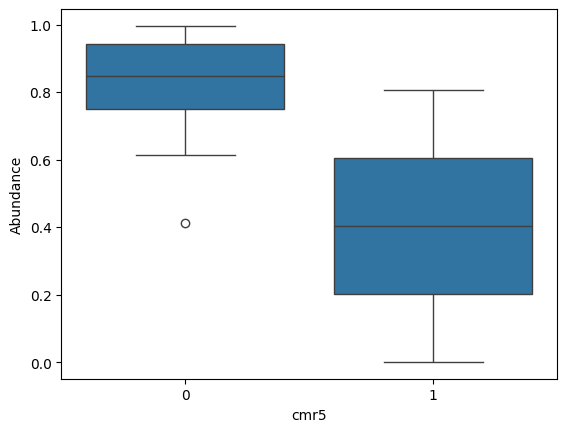

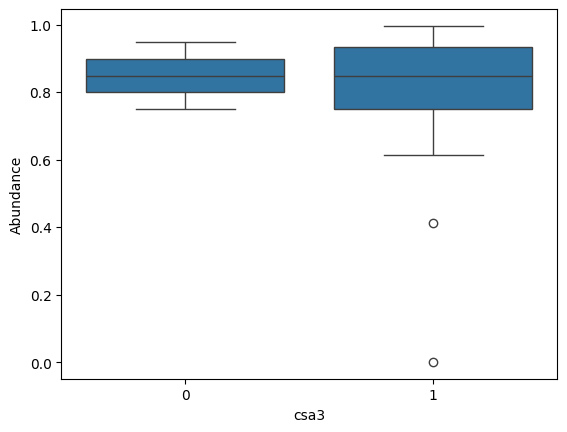

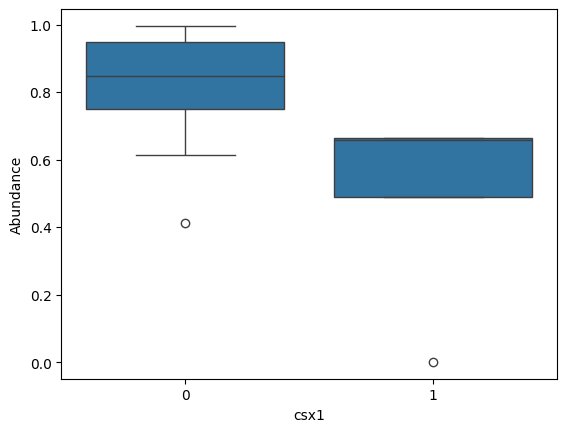

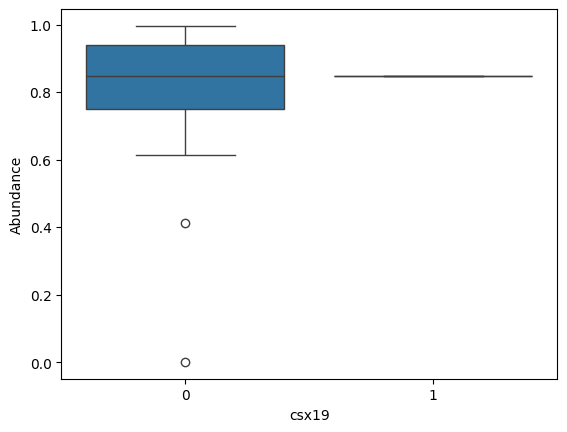

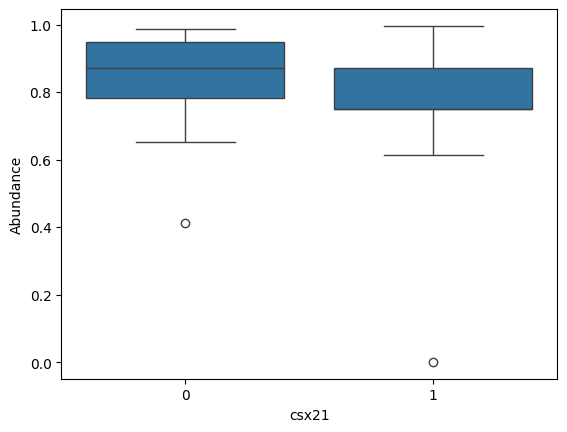

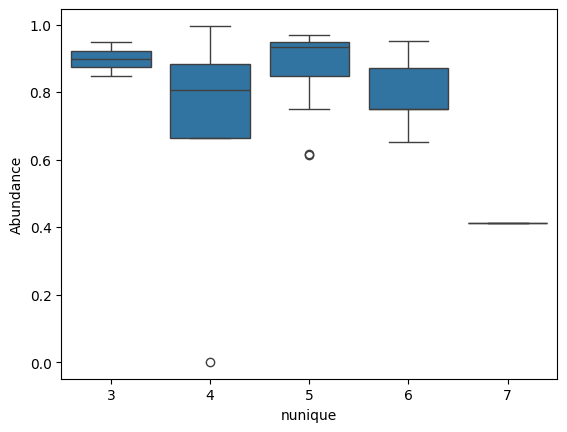

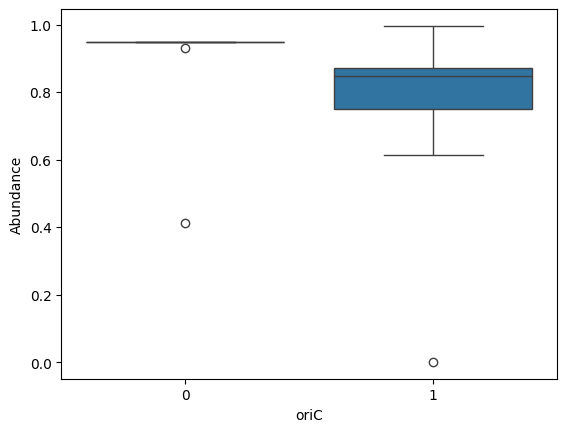

In [48]:
for feature in features:
    sns.boxplot(data=df_overview, x=feature, y='Abundance')
    plt.show()

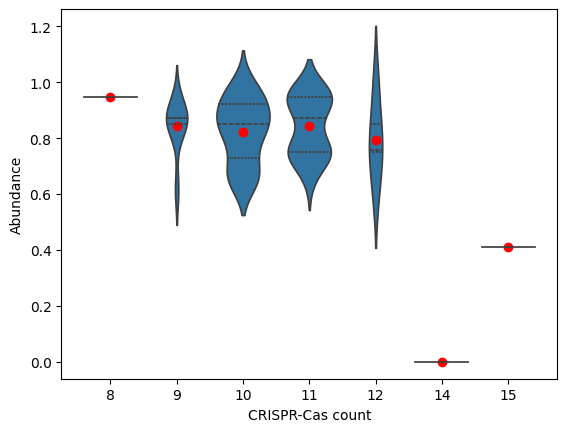

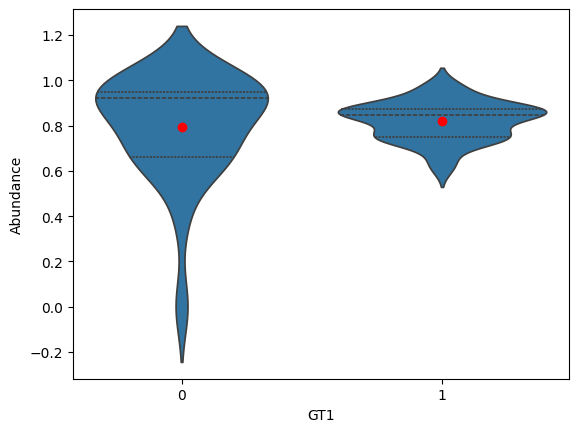

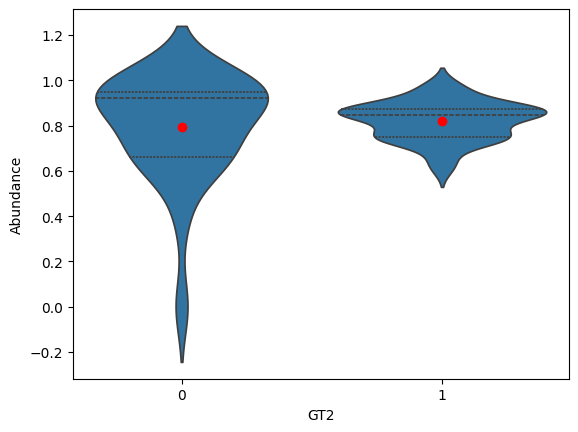

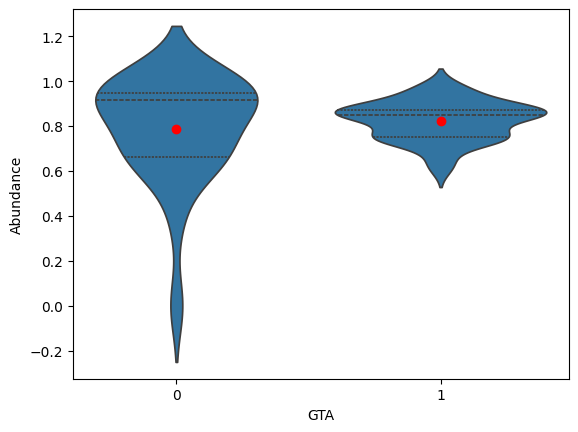

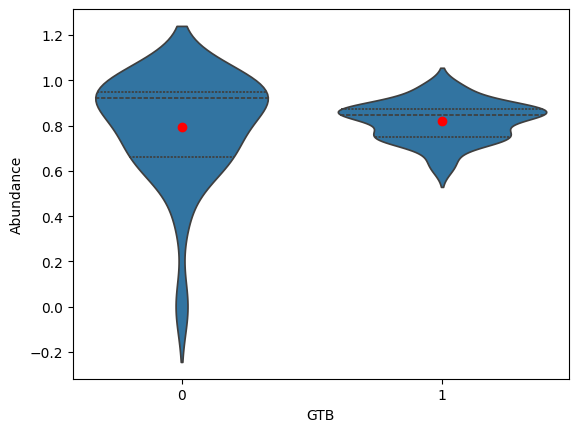

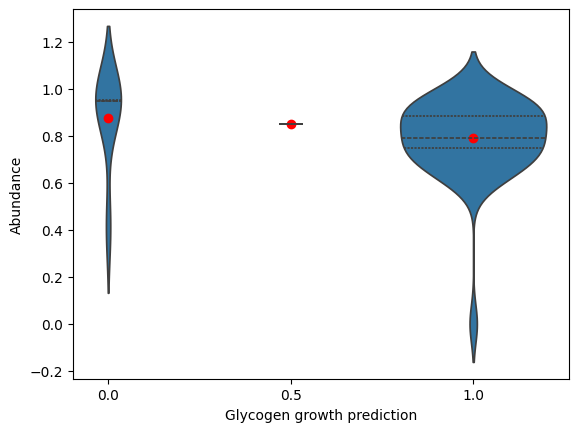

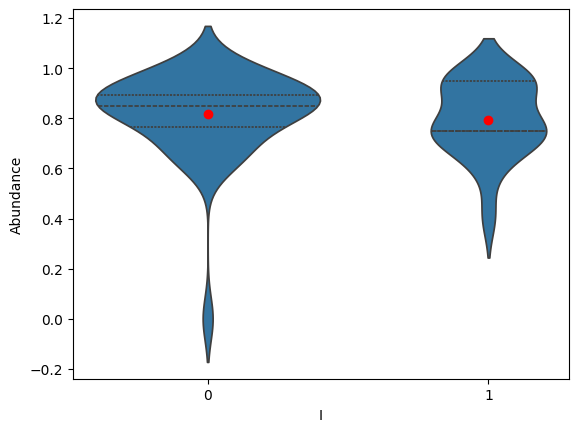

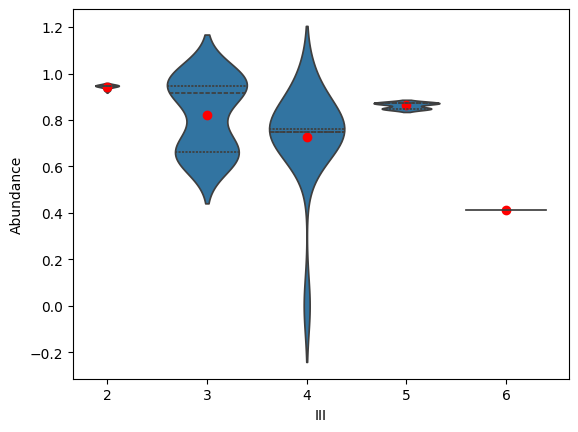

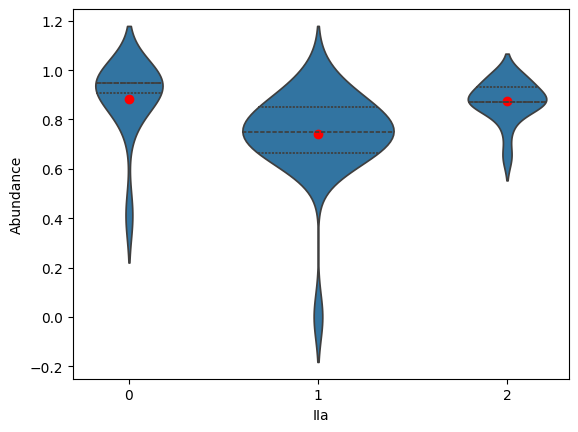

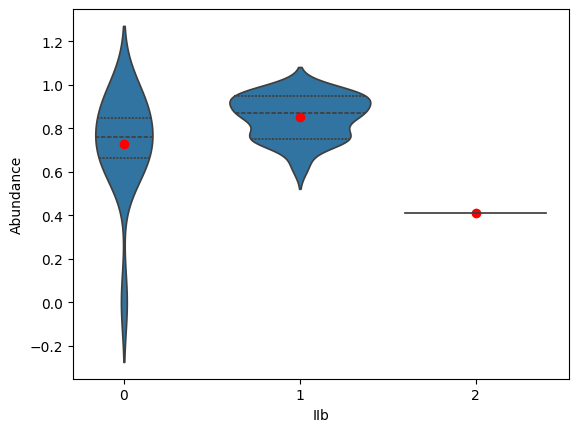

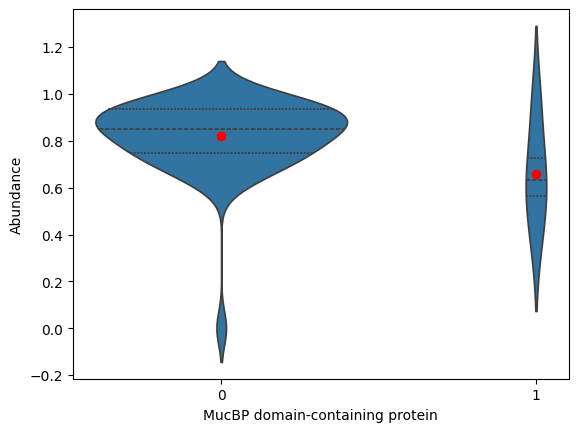

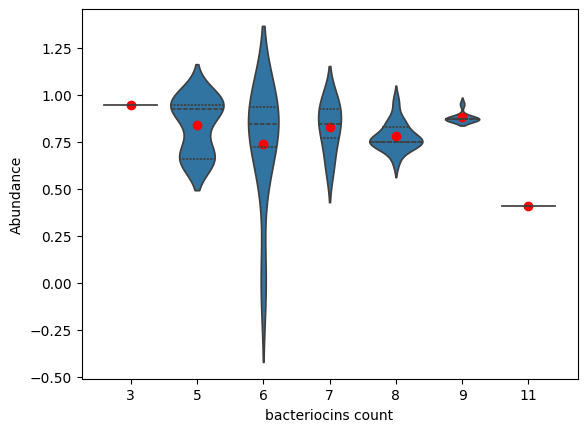

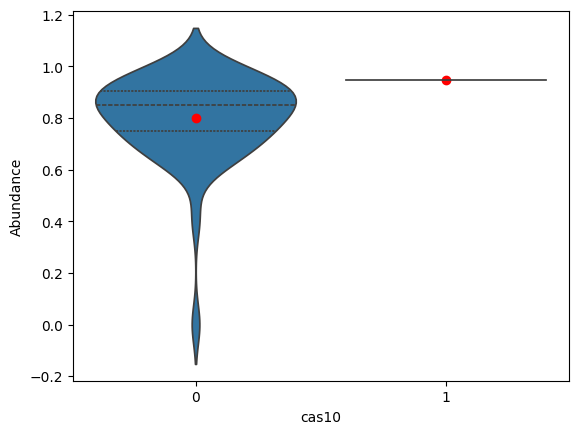

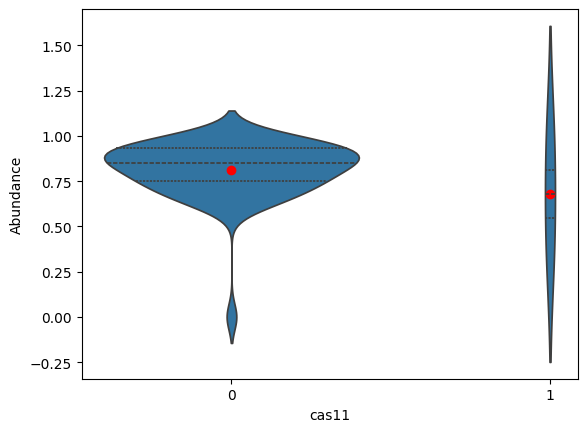

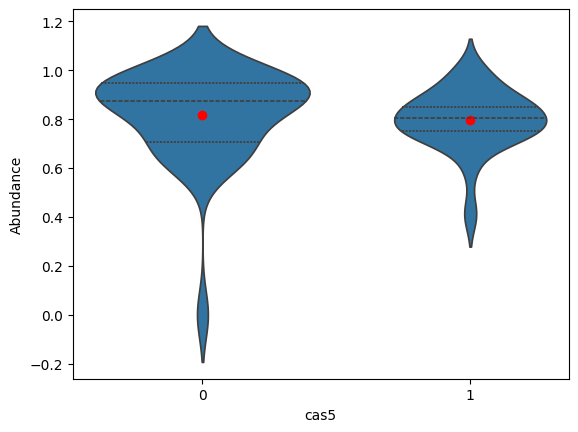

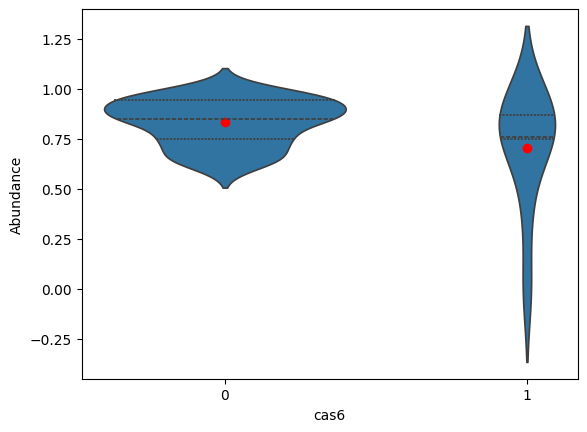

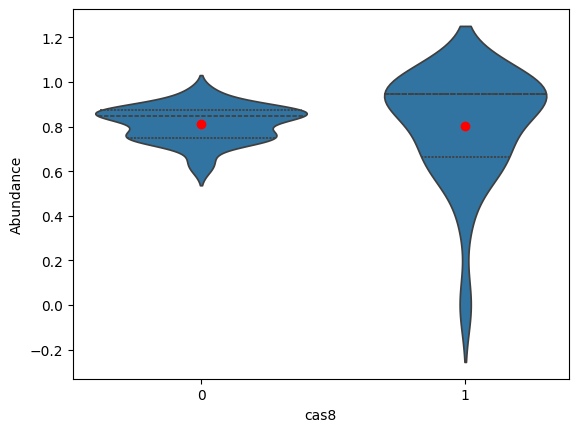

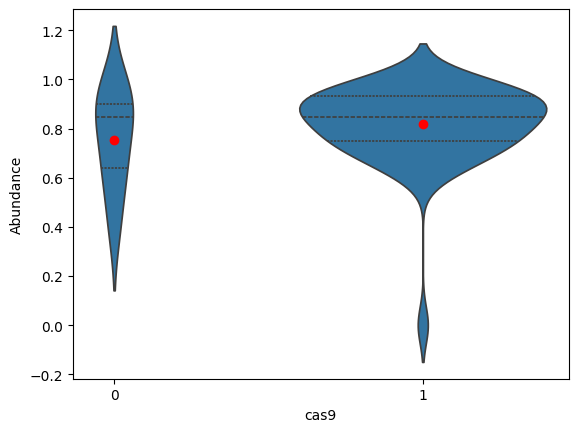

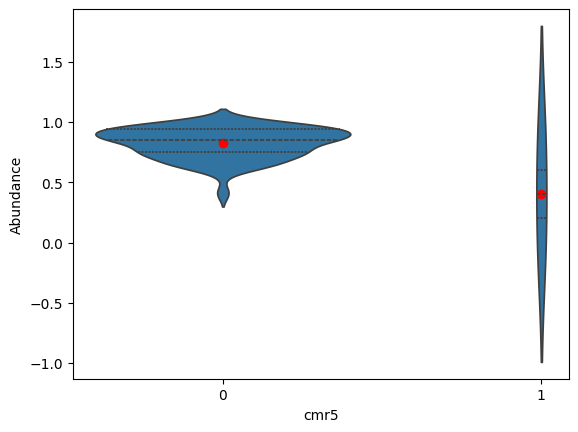

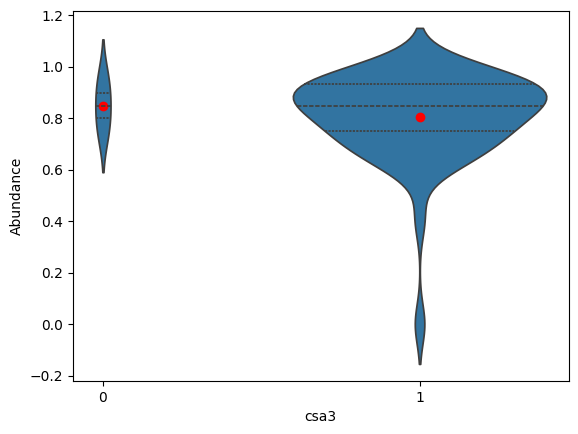

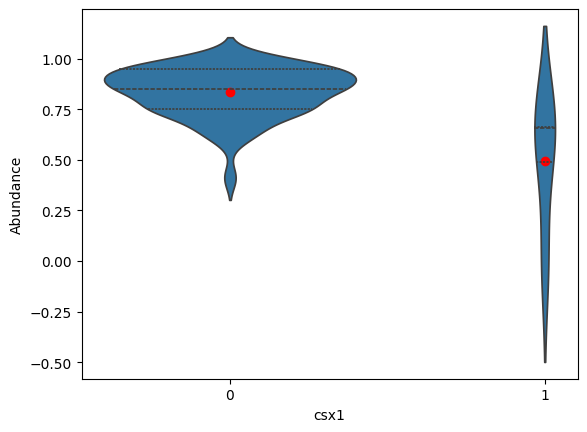

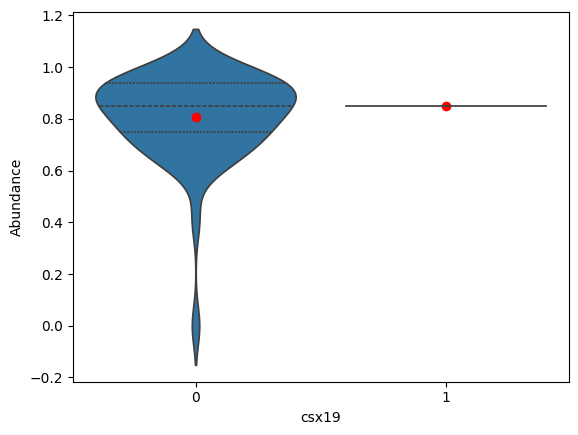

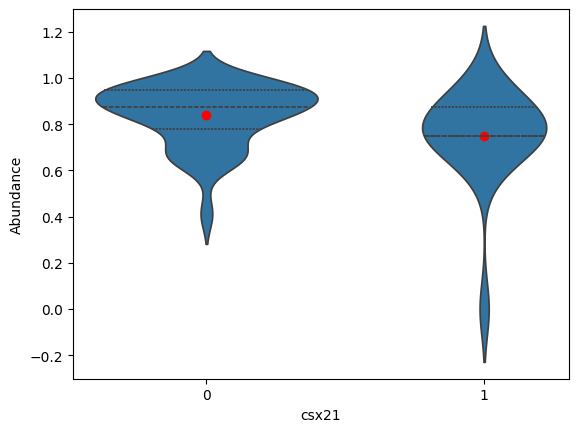

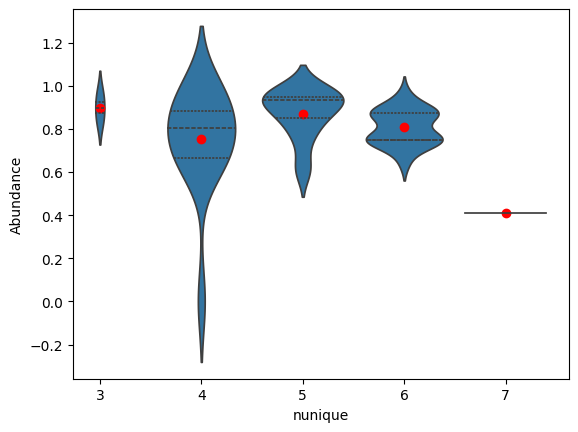

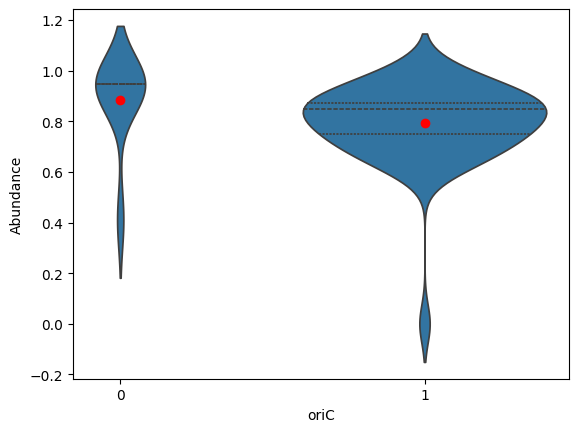

In [47]:
for feature in features:
    Means = df_overview.groupby(feature)['Abundance'].mean()
    fig, ax = plt.subplots()
    sns.violinplot(data=df_overview, x=feature, y='Abundance', inner='quart', density_norm='count')
    # plt.setp(ax.collections, alpha=.3)
    plt.scatter(x=range(len(Means)),y=Means,c="r")
    plt.show()

Glycogen growth prediction: 0 is higher than 0.5 and 1, except for one sample (Haifa1_1). 4 Rhea samples are 0. 4 samples total if Rhea combined

cmr5: 0 is higher than 1, but only 2 are positive.

csx1: 0 is higher than 1, but only 4 are positive (2 from Campanarius)

mucBP: 0 is higher than 1, but 4 are positive, Paulie1_1 is positive but has a high abundance 

In [31]:
# Perform one-way ANOVA for each feature against 'Abundance'
anova_results = {}
for feature in features:
    groups = [df_overview[df_overview[feature] == value]['Abundance'] for value in df_overview[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert results to a DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values(by='p-value', inplace=True)

# Print or save the results
print(anova_df)
anova_df.to_excel('/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/anova_results.xlsx')

                                 F-statistic       p-value
CRISPR-Cas count                   11.349026  3.642040e-07
csx1                               27.247842  3.462963e-06
cmr5                               19.314999  5.778605e-05
IIa                                 8.931621  4.928468e-04
IIb                                 7.103177  1.033345e-02
oriC                                7.088248  1.040889e-02
III                                 3.624540  1.942932e-02
csx21                               5.514382  2.285666e-02
Glycogen growth prediction          3.248174  4.735064e-02
cas6                                2.777659  1.018410e-01
cas10                               2.262854  1.388007e-01
nunique                             1.818047  1.564606e-01
MucBP domain-containing protein     0.740350  3.936561e-01
bacteriocins count                  1.056309  3.967530e-01
cas11                               0.703076  4.057428e-01
GTA                                 0.216046  6.440870e-

In [4]:
for feature in features:
    groups = [df_overview[df_overview[feature] == value]['Abundance'] for value in df_overview[feature].unique()]
    if len(groups) != 2:
        continue
    median = df_overview.groupby(feature)['Abundance'].median()
    mean = df_overview.groupby(feature)['Abundance'].mean()
    # print(median)
    # print(mean)
    print(feature, *stats.mannwhitneyu(groups[0], groups[1]))
    # print('\n')

GT1 278.0 0.30740611899364045
GT2 278.0 0.30740611899364045
GTA 287.0 0.42784849567361094
GTB 278.0 0.30740611899364045
I 330.0 0.5295096210711039
IIb 386.0 0.02800708124141264
MucBP domain-containing protein 99.0 0.3230254246950893
cas10 24.0 0.05274666102891308
cas11 9.0 0.2829109043043022
cas5 258.5 0.21160353681117938
cas6 225.5 0.4428195011164945
cas8 230.0 0.06341523009748637
cas9 151.0 0.7183863583147241
cmr5 81.0 0.14379448052006655
csa3 71.0 0.936984275256433
csx1 183.0 0.002771956997894786
csx19 27.0 0.9464919845384687
csx21 426.0 0.03205296072001832
oriC 49.0 0.0012312685600405018


# Statistics high, medium and low abundance

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_table.xlsx', skiprows=[0])
df.loc[df[df['Abundance'] >= 0.8].index, 'Abundance_group'] = 'high'
# df.loc[df[df['Abundance'] < 0.9].index, 'Abundance_group'] = 'medium'
df.loc[df[df['Abundance'] < 0.8].index, 'Abundance_group'] = 'low'

In [18]:
# df_grouped = df.groupby('Abundance_group').agg('nunique')
# display(df_grouped)
df_high = df[df['Abundance_group']=='high']

result_dict = {}
for col in df_high.columns:
    if col=='Sample name' or col=='Glycogen growth prediction indication': continue
    print(col)
    result_dict[col] = {}
    for index, value in df_high[col].value_counts().items():
        print(index, value)
        result_dict[col][index] = value
        # result_dict[f'{col}_{index}'] = value
        # result_dict[col][index] = value

Glycogen growth prediction
1.0 20
0.5 6
0.0 6
oriC
1 24
0 8
AR genes plasmid
0 32
Virulence genes plasmid
0 32
AR genes
0 32
Virulence genes
0 32
bacteriocins count
9 9
5 9
6 5
8 4
7 4
3 1
nunique
5 14
4 8
6 8
3 2
I
0 25
1 7
IIa
2 12
0 11
1 9
IIb
1 25
0 7
III
5 14
3 10
2 5
4 3
Unknown
0 32
CRISPR-Cas count
10 13
11 9
9 7
12 2
8 1
cas1
1 32
cas2
1 32
cas3
1 32
cas5
0 21
1 11
cas6
0 28
1 4
cas7
0 32
cas8
0 18
1 14
cas9
1 28
0 4
cas10
0 29
1 3
cas11
0 31
1 1
cas12
1 32
cmr5
0 31
1 1
csa3
1 30
0 2
cse2
0 32
csm2
0 32
csm6
0 32
csn2
1 32
csx1
0 32
csx3
1 32
csx19
0 31
1 1
csx21
0 25
1 7
DinG
1 32
Gram-positive cocci surface proteins LPxTG domain-containing protein
1 32
MucBP domain-containing protein
0 31
1 1
type IV pilus-like proteins
1 32
Putative adhesin domain-containing protein
1 32
GT1
1 18
0 14
GT2
1 18
0 14
GT3
0 32
GTA
1 19
0 13
GTB
1 18
0 14
UDP-galactopyra0semutase
0 32
Flippase
0 32
Abundance
0.8724173394652572 8
0.947578012512744 7
0.8487984881236701 7
0.9293416522690459 1
0.9

In [20]:
print(result_dict)
pd.DataFrame.from_dict(result_dict)
# display(df_high[df_high.columns].value_counts())
# df_high[df_high['Glycogen growth prediction']].value_counts().items().to_excel('/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/analysis/df_high.xlsx')

{'Glycogen growth prediction': {1.0: 20, 0.5: 6, 0.0: 6}, 'oriC': {1: 24, 0: 8}, 'AR genes plasmid': {0: 32}, 'Virulence genes plasmid': {0: 32}, 'AR genes': {0: 32}, 'Virulence genes': {0: 32}, 'bacteriocins count': {9: 9, 5: 9, 6: 5, 8: 4, 7: 4, 3: 1}, 'nunique': {5: 14, 4: 8, 6: 8, 3: 2}, 'I': {0: 25, 1: 7}, 'IIa': {2: 12, 0: 11, 1: 9}, 'IIb': {1: 25, 0: 7}, 'III': {5: 14, 3: 10, 2: 5, 4: 3}, 'Unknown': {0: 32}, 'CRISPR-Cas count': {10: 13, 11: 9, 9: 7, 12: 2, 8: 1}, 'cas1': {1: 32}, 'cas2': {1: 32}, 'cas3': {1: 32}, 'cas5': {0: 21, 1: 11}, 'cas6': {0: 28, 1: 4}, 'cas7': {0: 32}, 'cas8': {0: 18, 1: 14}, 'cas9': {1: 28, 0: 4}, 'cas10': {0: 29, 1: 3}, 'cas11': {0: 31, 1: 1}, 'cas12': {1: 32}, 'cmr5': {0: 31, 1: 1}, 'csa3': {1: 30, 0: 2}, 'cse2': {0: 32}, 'csm2': {0: 32}, 'csm6': {0: 32}, 'csn2': {1: 32}, 'csx1': {0: 32}, 'csx3': {1: 32}, 'csx19': {0: 31, 1: 1}, 'csx21': {0: 25, 1: 7}, 'DinG': {1: 32}, 'Gram-positive cocci surface proteins LPxTG domain-containing protein': {1: 32}, 'Mu

,Glycogen growth prediction,oriC,AR genes plasmid,Virulence genes plasmid,AR genes,Virulence genes,bacteriocins count,nunique,I,IIa,...,Putative adhesin domain-containing protein,GT1,GT2,GT3,GTA,GTB,UDP-galactopyra0semutase,Flippase,Abundance,Abundance_group
1.0,20.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,9.0,...,32.0,18.0,18.0,NaN,19.0,18.0,NaN,NaN,NaN,NaN
0.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,6.0,8.0,32.0,32.0,32.0,32.0,NaN,NaN,25.0,11.0,...,NaN,14.0,14.0,32.0,13.0,14.0,32.0,32.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,9.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# for col in df_grouped.columns:
#     sns.countplot(df_grouped[col].value_counts())
#     plt.show()

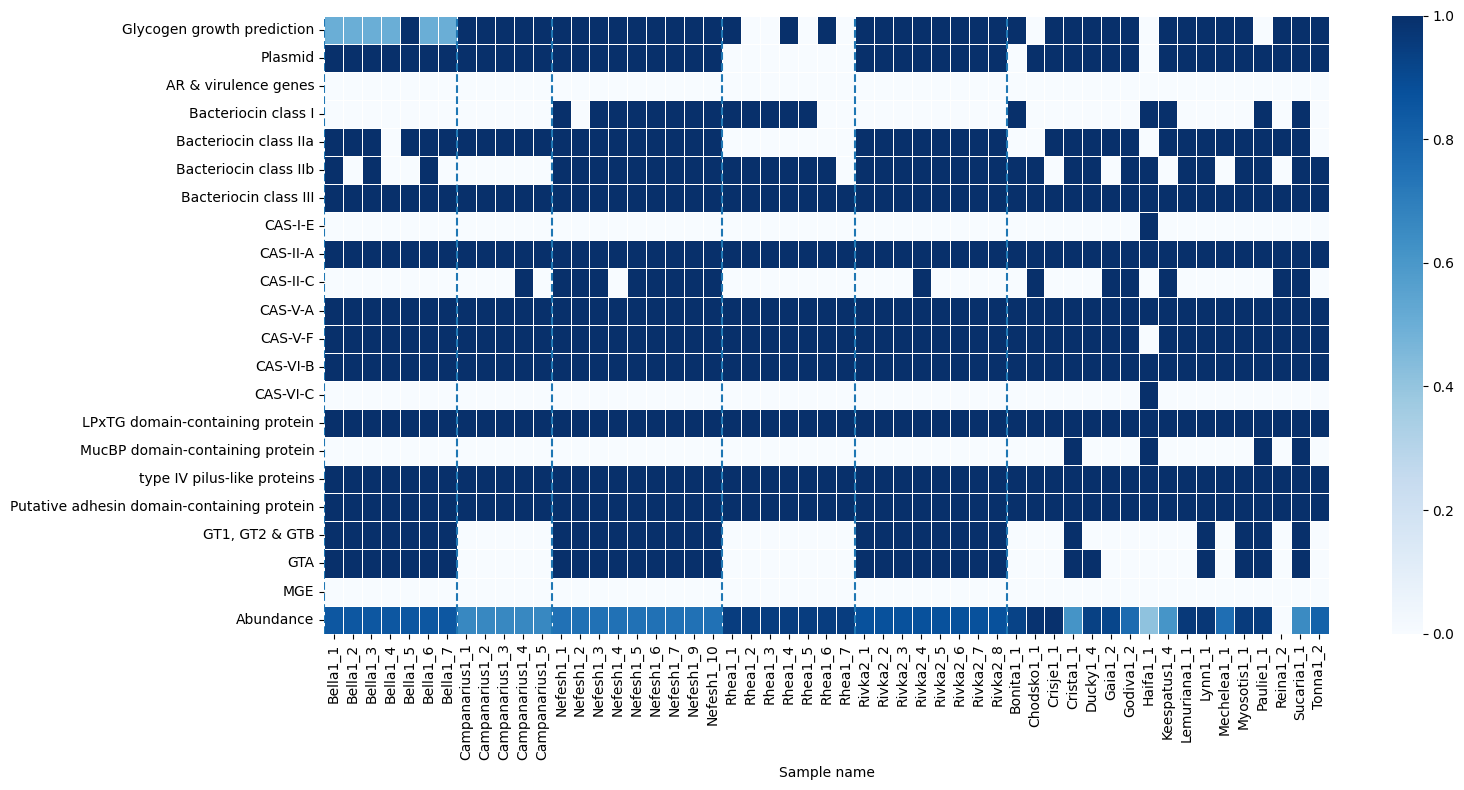

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# df_overview = pd.read_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_table_pres_absence.xlsx", index_col="Sample name")

# plt.figure(figsize=(16, 12))
# sns.heatmap(df_overview.T, linewidths=0.5, cmap="Blues")
# plt.show()

df_overview_2 = pd.read_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_table_pres_absence_v2.xlsx", index_col="Sample name")

plt.figure(figsize=(16, 8))
ax = sns.heatmap(df_overview_2.T, linewidths=0.5, cmap="Blues")
ax.axvline(x=0, ls="--")
ax.axvline(x=7, ls="--")
ax.axvline(x=12, ls="--")
ax.axvline(x=21, ls="--")
ax.axvline(x=28, ls="--")
ax.axvline(x=36, ls="--")
plt.tight_layout()
plt.savefig("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/probiotic_properties/overview_heatmap.png")